# install libs

In [1]:
!nvidia-smi

Thu Feb 24 01:31:26 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip3 install numpy scipy pandas timm pytorch_lightning pytorch_metric_learning mne moabb pyts --upgrade
!pip3 install https://api.github.com/repos/braindecode/braindecode/zipball/master --upgrade
!pip3 install git+https://github.com/pyRiemann/pyRiemann --upgrade

     |████████████████████████████████| 38.1 MB 1.4 MB/s 
     |████████████████████████████████| 431 kB 51.8 MB/s 
     |████████████████████████████████| 527 kB 32.4 MB/s 
     |████████████████████████████████| 106 kB 51.1 MB/s 
     |████████████████████████████████| 7.4 MB 34.1 MB/s 
     |████████████████████████████████| 144 kB 61.3 MB/s 
     |████████████████████████████████| 2.5 MB 58.7 MB/s 
     |████████████████████████████████| 397 kB 61.7 MB/s 
     |████████████████████████████████| 952 kB 48.4 MB/s 
     |████████████████████████████████| 596 kB 43.9 MB/s 
     |████████████████████████████████| 134 kB 56.5 MB/s 
     |████████████████████████████████| 829 kB 55.3 MB/s 
     |████████████████████████████████| 1.1 MB 47.1 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 636 kB 57.5 MB/s 
     |████████████████████████████████| 242 kB 50.0 MB/s 
     |████████████████████████████████| 144 kB 52.5 MB/s 
     |██████████

     \ 328 kB 170 kB/s
     |████████████████████████████████| 155 kB 4.3 MB/s 
  Created wheel for Braindecode: filename=Braindecode-0.6-py3-none-any.whl size=177385 sha256=cda9d5ec3261c891727e21157ed6b4de71f0a475e866397aa36a108f4e010142
  Stored in directory: /tmp/pip-ephem-wheel-cache-p964dcqc/wheels/8f/4c/d7/8348c16448de0348bc95d987a62f01e9c58d48bf58b86b0190
Successfully built Braindecode
  Cloning https://github.com/pyRiemann/pyRiemann to /tmp/pip-req-build-fuvpj__r
  Running command git clone -q https://github.com/pyRiemann/pyRiemann /tmp/pip-req-build-fuvpj__r
  Created wheel for pyriemann: filename=pyriemann-0.2.8.dev0-py2.py3-none-any.whl size=70422 sha256=285595151759b833c6792955ca41e26047083addd7801c43670102b6d730ed99
  Stored in directory: /tmp/pip-ephem-wheel-cache-xdu1lb7f/wheels/29/99/28/b50387a5b9ae89e1758bba40cf42f828f583d8844ae25ad342
Successfully built pyriemann
  Attempting uninstall: pyriemann
    Found existing installation: pyriemann 0.2.7
    Uninstalling pyriem

# load data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import glob
import os
import json
import numpy as np
import scipy.linalg as linalg
import pandas as pd
import mne
import matplotlib.pyplot as plt
import seaborn as sb
from braindecode.datasets import BaseConcatDataset
from shutil import copyfile
from tqdm import tqdm
from data_util import load_subjects, load_subject_data, load_data, euclidean_alignment, label_alignment, np_standardize

In [2]:
# data_dir = "/content/drive/MyDrive/DataVIN/Official"
data_dir = "../data/vin/Official"
# als_data_dir = "/content/drive/MyDrive/VIN_ALS"

found 97 subjects
CPU times: user 71.1 ms, sys: 12.6 ms, total: 83.7 ms
Wall time: 211 ms


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

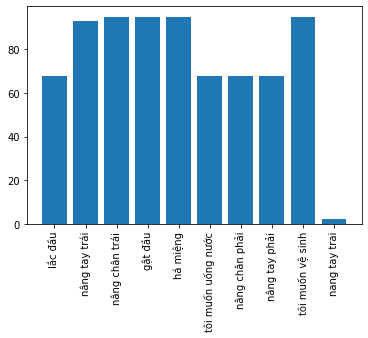

In [6]:
%%time
subjects_scenarios = load_subjects(data_dir)
print(f"found {len(subjects_scenarios)} subjects")

scenario_count = dict()
for _, scenarios in subjects_scenarios:
    for scenario in scenarios:
        if scenario in scenario_count:
            scenario_count[scenario] += 1
        else:
            scenario_count[scenario] = 1

plt.bar(scenario_count.keys(), scenario_count.values())
plt.xticks(rotation='vertical')

### download EEG data

In [ ]:
os.makedirs("./data", exist_ok=True)
for subject, _ in tqdm(subjects_scenarios):
    os.makedirs(f"./data/{subject}", exist_ok=True)
    copyfile(f"{data_dir}/{subject}/info.json", f"./data/{subject}/info.json")
    for sample_dir in glob.glob(f"{data_dir}/{subject}/sample*"):
        sample_name = sample_dir.split("/")[-1]
        if os.path.exists(f"{sample_dir}/eeg.json") and os.path.exists(f"{sample_dir}/EEG.edf"):
            os.makedirs(f"./data/{subject}/{sample_name}", exist_ok=True)
            copyfile(f"{sample_dir}/eeg.json", f"./data/{subject}/{sample_name}/eeg.json")
            copyfile(f"{sample_dir}/EEG.edf", f"./data/{subject}/{sample_name}/EEG.edf")

100%|██████████| 97/97 [03:09<00:00,  1.95s/it]


In [ ]:
!zip -qr vin_data.zip ./data/

In [ ]:
!cp ./vin_data.zip ./drive/MyDrive

### EEG decoding

In [ ]:
full_scenarios_subjects = list()
for subject, scenarios in subjects_scenarios:
    if len(scenarios) == 9:
        full_scenarios_subjects.append(subject)

print(f"{len(full_scenarios_subjects)} subjects: {sorted(full_scenarios_subjects)}")

65 subjects: ['BN001', 'BN002', 'BN003', 'K299', 'K300', 'K309', 'K310', 'K311', 'K312', 'K313', 'K314', 'K315', 'K316', 'K318', 'K319', 'K320', 'K321', 'K322', 'K323', 'K324', 'K325', 'K326', 'K327', 'K328', 'K329', 'K330', 'K331', 'K332', 'K333', 'K334', 'K335', 'K336', 'K337', 'K338', 'K339', 'K340', 'K342', 'K343', 'K344', 'K350', 'K351', 'K352', 'K353', 'K354', 'K355', 'K356', 'K357', 'K358', 'K359', 'K360', 'K361', 'K362', 'K363', 'K364', 'K365', 'K366', 'K367', 'K368', 'K369', 'K370', 'K371', 'K372', 'K373', 'K374', 'K375']


In [ ]:
full_scenarios_subjects, _ = zip(*subjects_scenarios)
len(full_scenarios_subjects)

97

In [3]:
%%time
# fmt: off
# subjects = [
#     # 'K299', 'K300', 
#     'K309', 'K310', 'K311', 'K312', 'K313', 
#     'K314', 'K315', 'K316', 'K318', 'K319', 
#     'K320', 'K321', 'K322', 'K323', 'K324', 
#     'K325', 'K326', 'K327', 'K328', 'K329', 
#     'K330', 'K331', 'K332', 'K333', 'K334', 
#     'K335', 'K336', 'K337', 'K338', 'K339', 
#     'K340', 'K342', 'K343', 'K344', 'K350', 
#     'K351', 'K352', 'K353', 'K354', 'K355', 
#     'K356', 'K357', 'K358', 'K359', 'K360', 
#     'K361', 'K362', 'K363', 'K364', 'K365', 
#     'K366', 'K367', 'K368', 'K369', 'K370', 
#     'K371', 'K372', 'K373', 'K374', 'K375',
# ]

subjects = [
    'K300', 'K309', 'K311', 'K312', 'K313', 
    'K314', 'K315', 'K316', 'K320', 'K321', 
    'K322', 'K323', 'K324', 'K325', 'K327', 
    'K328', 'K329', 'K332', 'K335', 'K336', 
    'K337', 'K338', 'K339', 'K354', 'K355', 
    'K358', 'K359', 'K360', 'K361', 'K362', 
    'K364', 'K366', 'K368', 'K369', 'K370', 
    'K371', 'K372', 'K373', 'K374', 'K375',
]

# subjects = [
#     "K300", "K311", "K312", "K313", "K315", 
#     "K320", "K324", "K329", "K336", "K337", 
#     "K338", "K339", "K358", "K359", "K360", 
#     "K366", "K368", "K369", "K373", "K374", "K375",
# ]

# use_k_subjects = True  # @param {"type": "boolean"}
# use_bn_subjects = False  # @param {"type": "boolean"}

# subjects = list()
# if use_k_subjects:
#     subjects.extend([subject for subject in full_scenarios_subjects if subject.startswith("K")])
# if use_bn_subjects:
#     subjects.extend([subject for subject in full_scenarios_subjects if subject.startswith("BN")])

subjects = sorted(subjects)

scenarios = [
    "nâng tay trái",
    "nâng tay phải",
    "nâng chân trái",
    "nâng chân phải",
    # "gật đầu",
    # "lắc đầu",
    # "há miệng",
]

events = [
    "Thinking",
    # "Thinking and Acting",
    # "Resting",
    # "Typing",
]

channels = [
    "Fp1", "Fp2",
    "F7", "F3", "Fz", "F4", "F8",
    "FT9", "FC5", "FC1", "FC2", "FC6", "FT10",
    "T7", "C3", "Cz", "C4", "T8",
    "CP5", "CP1", "CP2", "CP6",
    "P7", "P3", "Pz", "P4", "P8",
    "PO9", "O1", "Oz", "O2", "PO10",
]
# channels = [
#     # "F3", "Fz", "F4",
#     "FC5", "FC1", "FC2", "FC6",
#     "C3", "Cz", "C4",
#     "CP5", "CP1", "CP2", "CP6",
#     # "P3", "Pz", "P4",
# ]

label_mapping={
    # "nâng tay trái_Thinking": "mi",
    # "nâng tay phải_Thinking": "mi",
    "nâng tay trái_Thinking": "nâng tay trái",
    "nâng tay phải_Thinking": "nâng tay phải",
#     "nâng tay trái_Thinking": "nâng tay",
#     "nâng tay phải_Thinking": "nâng tay",
    # "nâng chân trái_Thinking": "mi",
    # "nâng chân phải_Thinking": "mi",
    "nâng chân trái_Thinking": "nâng chân trái",
    "nâng chân phải_Thinking": "nâng chân phải",
    # "nâng chân trái_Thinking": "nâng chân",
    # "nâng chân phải_Thinking": "nâng chân",
    # "gật đầu_Thinking": "mi",
    # "lắc đầu_Thinking": "mi",
    "gật đầu_Thinking": "gật đầu",
    "lắc đầu_Thinking": "lắc đầu",
    # "gật đầu_Thinking": "đầu",
    # "lắc đầu_Thinking": "đầu",
    # "nâng tay trái_Thinking and Acting": "nâng tay trái",
    # "nâng tay phải_Thinking and Acting": "nâng tay phải",
    # "nâng chân trái_Thinking and Acting": "nâng chân trái",
    # "nâng chân phải_Thinking and Acting": "nâng chân phải",
    # "gật đầu_Thinking and Acting": "gật đầu",
    # "lắc đầu_Thinking and Acting": "lắc đầu",
    "Resting": "rest",
}

n_channels = len(channels)

print(f"using {n_channels} channels")

minimal_trial_duration = 4  # @param
window_duration = 2  # @param
window_stride_duration = 0.25  # @param

fmin = 8.0  # @param
fmax = 30.0  # @param

# subjects.remove("K324")

ds = load_data(
    data_dir,  
    subjects=subjects,
    scenarios=scenarios,
    events=events,
    channels=channels,
    label_mapping=label_mapping,
    minimal_trial_duration=minimal_trial_duration,
    window_duration=window_duration, 
    window_stride_duration=window_stride_duration, 
    start_offset=0,
    stop_offset=0,
    fmin=fmin, 
    fmax=fmax, 
    moving_standardize=False,
    epoch_standardize=False,
    resample=None,
    return_raw=False,
    return_preprocessed=False,
    preload=True,
)

als_subjects = ["ALS01_t1", "ALS01_t2", "ALS02_t1", "ALS02_t2"]

# als_ds = load_data(
#     als_data_dir,  
#     subjects=als_subjects,
#     scenarios=scenarios,
#     events=events,
#     channels=channels,
#     label_mapping=label_mapping,
#     minimal_trial_duration=minimal_trial_duration,
#     window_duration=window_duration, 
#     window_stride_duration=window_stride_duration, 
#     start_offset=0,
#     stop_offset=0,
#     fmin=fmin, 
#     fmax=fmax, 
#     moving_standardize=False,
#     epoch_standardize=False,
#     resample=None,
#     return_raw=False,
#     return_preprocessed=False,
#     preload=True,
# )

# ds = BaseConcatDataset([ds, als_ds])

# fmt: on

for _ds in ds.datasets:
    _ds_info = _ds.description
    if _ds_info["subject"] == "K314":
        _ds_info["subject"] = "K314_t1"
    elif _ds_info["subject"] == "K324":
        _ds_info["subject"] = "K314_t2"

ds_info = ds.description

using 32 channels


subject:  82%|██████████████████████████████████████████████████████████████████████               | 80/97 [00:01<00:00, 51.07it/s]/home/txdat/code/eeg-motor-imagery/notebooks/data_util.py:228: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_edf(f"{sample_dir}/EEG.edf", preload=False, verbose=False)
/home/txdat/code/eeg-motor-imagery/notebooks/data_util.py:228: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_edf(f"{sample_dir}/EEG.edf", preload=False, verbose=False)
/home/txdat/code/eeg-motor-imagery/notebooks/data_util.py:228: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_edf(f"{sample_dir}/EEG.edf", preload=False, verbose=False)
subject:  89%|███████████████████████████████████████████████████████████████████████████▎         | 86/97 [00:01<00:00, 40.65it/s]/home/txdat/code/eeg-motor-imagery/notebooks/dat

CPU times: user 11.6 s, sys: 914 ms, total: 12.5 s
Wall time: 14.7 s


In [4]:
ds_info["epochs"] = 0
for i, r in ds_info.iterrows():
    ds_info.loc[i, "epochs"] = len(ds.datasets[i].windows)

ds_info.sort_values(["subject", "scenario"], ascending=True)

,subject,scenario,event,label,trial,split,epochs
9,K300,nâng chân phải,Thinking,nâng chân phải,0,train,19
10,K300,nâng chân phải,Thinking,nâng chân phải,1,train,16
11,K300,nâng chân phải,Thinking,nâng chân phải,2,train,12
6,K300,nâng chân trái,Thinking,nâng chân trái,0,train,19
7,K300,nâng chân trái,Thinking,nâng chân trái,1,train,18
...,...,...,...,...,...,...,...
474,K375,nâng tay phải,Thinking,nâng tay phải,1,train,19
475,K375,nâng tay phải,Thinking,nâng tay phải,2,train,23
470,K375,nâng tay trái,Thinking,nâng tay trái,0,train,24
471,K375,nâng tay trái,Thinking,nâng tay trái,1,train,21


In [ ]:
ds_info[ds_info["trial"] == 0].groupby(["subject"]).sum().sort_values("epochs")

,trial,epochs
subject,,
K324,0,59
K359,0,65
K372,0,65
K373,0,67
K320,0,68
K321,0,69
K371,0,69
K370,0,70
K354,0,71


In [ ]:
len(ds_info["subject"].unique())

39

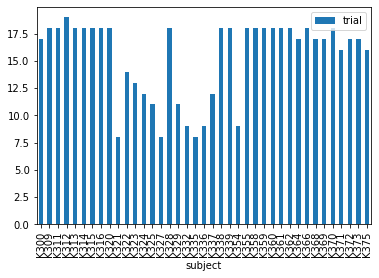

In [ ]:
ds_info[["subject", "trial"]].groupby("subject").count().plot.bar()

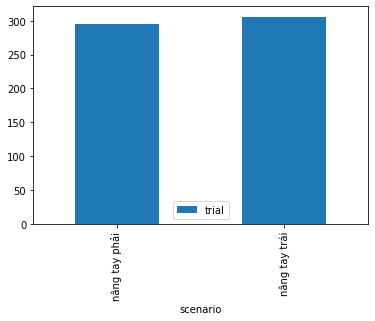

In [ ]:
ds_info[["scenario", "trial"]].groupby("scenario").count().plot.bar()

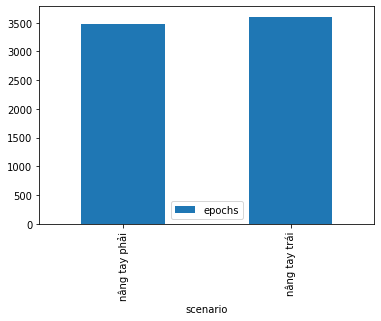

In [ ]:
ds_info[["scenario", "epochs"]].groupby("scenario").sum().plot.bar()

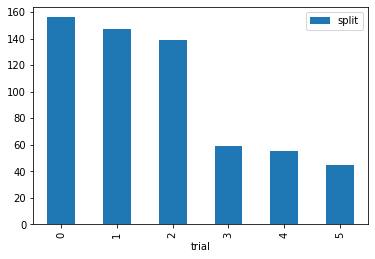

In [ ]:
ds_info[["trial", "split"]].groupby("trial").count().plot.bar()

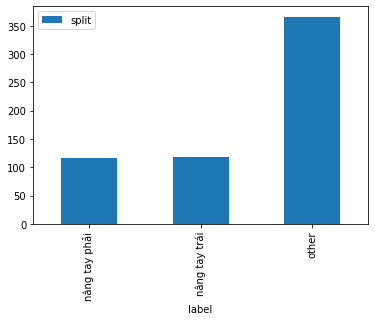

In [ ]:
ds_info[["label", "split"]].groupby("label").count().plot.bar()

In [ ]:
y = list()
for epochs in ds.datasets:
    y.extend(epochs.y)

print(np.bincount(np.array(y, dtype=int)))

[4082 1485 1506]


In [ ]:
ds.datasets[0].windows[0].get_data()

array([[[ 0.00067619, -0.00062286, -0.00057478, ..., -0.00536649,
          0.00094801,  0.00698332],
        [ 0.00376193,  0.00251048,  0.00189307, ..., -0.00478991,
         -0.00054234,  0.00766737],
        [ 0.003245  , -0.00122421,  0.00190019, ...,  0.0043278 ,
          0.00301957,  0.00302282],
        ...,
        [ 0.00102252,  0.00280375,  0.00538759, ..., -0.00368402,
          0.00032768,  0.00496592],
        [ 0.00618139,  0.00588539,  0.00703288, ..., -0.00145795,
          0.00061722,  0.00695177],
        [ 0.00931617,  0.00779809,  0.00679059, ..., -0.00400978,
         -0.00215758,  0.00435564]]])

In [5]:
from typing import Optional, Tuple, Type
import math
import random
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as td
# from pytorch_metric_learning.losses import ArcFaceLoss
from braindecode.util import set_random_seeds
from braindecode.augmentation import AugmentedDataLoader, ChannelsDropout, GaussianNoise, SmoothTimeMask, TimeReverse, Mixup
from braindecode.models import ShallowFBCSPNet, Deep4Net, EEGNetv4, TIDNet
from braindecode import EEGClassifier
# from braindecode.training.losses import CroppedLoss
from braindecode.datasets import BaseConcatDataset
from skorch.callbacks import LRScheduler, EarlyStopping, Initializer, LoadInitState, Freezer, Checkpoint, TrainEndCheckpoint
from skorch.helper import predefined_split
from skorch.setter import optimizer_setter
from skorch.dataset import unpack_data
from skorch.utils import to_tensor
from sklearn.utils.class_weight import compute_class_weight
import sklearn.metrics as metrics
from functools import partial
from copy import deepcopy
from tqdm import tqdm
import time
from datetime import timedelta

from eadam import EAdam  # download from https://github.com/yuanwei2019/EAdam-optimizer/blob/main/EAdam.py

In [6]:
device = torch.device("cuda")

seed = 42  # @param
# set_random_seeds(seed=seed, cuda=True, cudnn_benchmark=None)  # reproduce result

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.benchmark=False
torch.backends.cudnn.deterministic=True

In [7]:
def init_weights(model, use_xavier=True):
    for m in model.modules():
        if isinstance(m, (nn.Conv2d, nn.Conv1d, nn.Linear)):
            if use_xavier:
                nn.init.xavier_uniform_(m.weight, gain=1.0)
            else:
                nn.init.kaiming_uniform_(m.weight, nonlinearity="leaky_relu")

            if m.bias is not None:
                nn.init.constant_(m.bias, 0)

        elif isinstance(m, (nn.BatchNorm2d, nn.BatchNorm1d)):
            nn.init.constant_(m.weight, 1)
            nn.init.constant_(m.bias, 0)

In [8]:
class Square(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return x * x


class SafeLog(nn.Module):
    def __init__(self, eps=1e-6):
        super().__init__()

        self.eps = eps

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return torch.log(torch.clamp(x, min=self.eps))


class Covariance(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # x: [bsz, *, ch, t]
        xm = x - x.mean(dim=-1, keepdim=True)
        return torch.matmul(xm, xm.transpose(-1, -2)) / (x.size(-1) - 1)


class ConstraintConv2d(nn.Conv2d):
    def __init__(self, *args, maxnorm=1.0, **kwargs):
        super().__init__(*args, **kwargs)

        self.maxnorm = maxnorm

    def forward(self, x):
        self.weight.data = torch.renorm(
            self.weight.data, p=2, dim=0, maxnorm=self.maxnorm
        )

        return super().forward(x)


class Conv2d(nn.Sequential):
    def __init__(
        self,
        in_channels,
        out_channels,
        *args,
        use_constraint_conv=False,
        use_sep_conv=False,
        use_norm=False,
        use_act=False,
        **kwargs
    ):
        super().__init__()

        conv_class = [nn.Conv2d, ConstraintConv2d][int(use_constraint_conv)]

        if use_sep_conv:
            kwargs.pop("groups", None)
            self.add_module(
                "dw_conv",
                conv_class(
                    in_channels, in_channels, *args, groups=in_channels, **kwargs
                ),
            )

            if use_norm:
                self.add_module("dw_norm", nn.BatchNorm2d(in_channels))

            for k in ["kernel_size", "stride", "padding", "groups", "bias"]:
                kwargs.pop(k, None)
            self.add_module(
                "pw_conv",
                conv_class(
                    in_channels,
                    out_channels,
                    kernel_size=(1, 1),
                    stride=(1, 1),
                    padding=(0, 0),
                    groups=1,
                    bias=False,
                    **kwargs,
                ),
            )

            if use_norm:
                self.add_module("pw_norm", nn.BatchNorm2d(out_channels))

        else:
            self.add_module(
                "conv", conv_class(in_channels, out_channels, *args, **kwargs)
            )

            if use_norm:
                self.add_module("norm", nn.BatchNorm2d(out_channels))

        if use_act:
            self.add_module("act", nn.ELU(inplace=True))
            # self.add_module("act", nn.SiLU(inplace=True))


def drop_path(
    x, drop_prob: float = 0.0, training: bool = False, scale_by_keep: bool = True
):
    """Drop paths (Stochastic Depth) per sample (when applied in main path of residual blocks).
    This is the same as the DropConnect impl I created for EfficientNet, etc networks, however,
    the original name is misleading as 'Drop Connect' is a different form of dropout in a separate paper...
    See discussion: https://github.com/tensorflow/tpu/issues/494#issuecomment-532968956 ... I've opted for
    changing the layer and argument names to 'drop path' rather than mix DropConnect as a layer name and use
    'survival rate' as the argument.
    """
    if drop_prob == 0.0 or not training:
        return x

    keep_prob = 1 - drop_prob
    shape = (x.shape[0],) + (1,) * (
        x.ndim - 1
    )  # work with diff dim tensors, not just 2D ConvNets
    random_tensor = x.new_empty(shape).bernoulli_(keep_prob)
    if keep_prob > 0.0 and scale_by_keep:
        random_tensor.div_(keep_prob)
    return x * random_tensor


class DropPath(nn.Module):
    """Drop paths (Stochastic Depth) per sample  (when applied in main path of residual blocks)."""

    def __init__(self, drop_prob: float = 0.0, scale_by_keep: bool = True):
        super(DropPath, self).__init__()
        self.drop_prob = drop_prob
        self.scale_by_keep = scale_by_keep

    def forward(self, x):
        return drop_path(x, self.drop_prob, self.training, self.scale_by_keep)


class SqueezeExcite(nn.Module):
    def __init__(self):
        super().__init__()


In [9]:
class LinearWithConstraint(nn.Linear):
    def __init__(self, *args, max_norm: float = 1.0, **kwargs):
        self.max_norm = max_norm
        super(LinearWithConstraint, self).__init__(*args, **kwargs)

    def forward(self, x):
        self.weight.data = torch.renorm(
            self.weight.data, p=2, dim=0, maxnorm=self.max_norm
        )
        return super(LinearWithConstraint, self).forward(x)


class SymmetricSpatialBlock(nn.Module):
    """
    Symmetric left-right spatial features
    https://arxiv.org/abs/2004.02965

    inputs' channels:
        [left's channels,
         center's channels,
         right's channels]
    with left/right's channels are symmetric
    """

    def __init__(
        self,
        in_channels,
        out_channels,
        n_channels,  # electrodes
        n_center_channels=0,  # electrodes
        **kwargs,
    ):
        assert (n_channels - n_center_channels) % 2 == 0, "not symmetric electrodes"

        super().__init__()

        self.conv = Conv2d(
            in_channels,
            out_channels,
            kernel_size=(n_channels, 1),
            stride=(n_channels, 1),
            padding=(0, 0),
            bias=False,
            **kwargs,
        )

        n_lr_channels = (n_channels - n_center_channels) // 2
        self.lr_conv = Conv2d(
            in_channels,
            out_channels,
            kernel_size=(n_lr_channels, 1),
            stride=(n_lr_channels + n_center_channels, 1),  # skip center's channels
            padding=(0, 0),
            bias=False,
            **kwargs,
        )

    def forward(self, x):
        x = torch.cat([self.conv(x), self.lr_conv(x)], dim=2)  # [N*CT] -> [N*3T]
        return x


class DynamicSpatialBlock(nn.Module):
    """
    Dynamic spatial filtering (n_in_channels -> n_out_channels)
    https://arxiv.org/abs/2105.12916

    # TODO: check working with normalized EEG?
    """

    def __init__(self, n_in_channels, n_out_channels, logcov=True, soft_thresh=0.1, drop_prob=0.25):
        super().__init__()

        inp = (n_in_channels * (n_in_channels + 1) // 2) if logcov else n_in_channels
        out = n_out_channels * n_in_channels + n_out_channels
        hid = inp // 4

        self.linear = nn.Sequential(
            nn.Linear(inp, hid, bias=True),
            nn.ReLU(inplace=True),
            # nn.Dropout(p=drop_prob),
            nn.Linear(hid, out, bias=True),
            # LinearWithConstraint(hid, out, max_norm=1.0, bias=True),
        )

        self.inds = torch.triu_indices(
            n_in_channels, n_in_channels
        )  # upper, [2,n_in*(n_in+1)/2]

        self.n_in_channels = n_in_channels
        self.n_out_channels = n_out_channels
        self.logcov = logcov
        self.soft_thresh = soft_thresh

    def forward(self, x):  # x: [B,C,T]
        # x is not NORMALIZED

        if self.logcov:
            # compute log-covariance
            # log(C) = Ulog(V)U.T
            xm = x - x.mean(dim=2, keepdim=True)
            cov = torch.matmul(xm, xm.transpose(2, 1)) / (xm.size(2) - 1)

            e, v = torch.linalg.eigh(cov, UPLO="U")
            e = torch.log(torch.clamp(e, min=1e-10))
            log_cov = torch.matmul(
                torch.matmul(v, e.diag_embed()), v.transpose(2, 1)
            )  # [B,C,C]

            feats = log_cov[:, self.inds[0], self.inds[1]]  # [B,n_in*(n_in+1)/2]

        else:
            # compute log-variance
            feats = torch.log(torch.var(x, dim=2, unbiased=True))
            feats[torch.isneginf(feats)] = 0

        feats = self.linear(feats)  # [B,n_out*n_in+n_out]

        w = feats[:, : -self.n_out_channels].reshape(
            -1, self.n_out_channels, self.n_in_channels
        )  # [B,n_out,n_in]
        b = feats[:, -self.n_out_channels :].reshape(
            -1, self.n_out_channels, 1
        )  # [B,n_out,1]

        if self.logcov and self.soft_thresh > 0:
            # apply soft-thresholding in [-thr,thr]
            w = torch.clamp(w - self.soft_thresh, min=0) + torch.clamp(
                w + self.soft_thresh, max=0
            )

        x = (x - x.mean(dim=2, keepdim=True)) / x.std(dim=2, keepdim=True)
        x = torch.matmul(w, x) + b

        return x


In [10]:
class ChannelSelfAttn(nn.Module):
    def __init__(self, F):
        super().__init__()

        self.conv1 = nn.Conv2d(
            1, F, kernel_size=(1, 1), stride=(1, 1), padding=(0, 0), bias=True
        )
        self.conv2 = nn.Conv2d(
            1, F, kernel_size=(1, 1), stride=(1, 1), padding=(0, 0), bias=True
        )

        self.gamma = nn.Parameter(torch.zeros(1))

    def forward(self, x):  # [B,1,C,T]
        b, _, c, t = x.size()
        x1 = self.conv1(x).permute(0, 2, 1, 3).reshape(b, c, -1)  # [B,C,F*T]
        x2 = self.conv2(x).permute(0, 1, 3, 2).reshape(b, -1, c)  # [B,F*T,C]

        e = torch.matmul(x1, x2)  # [B,C,C]
        e_max, _ = e.max(dim=2, keepdim=True)
        e_min, _ = e.min(dim=2, keepdim=True)
        e = (e - e_min) / (e_max - e_min + 1e-8)
        e = F.softmax(e, dim=2).unsqueeze(1)  # [B,1,C,C]

        x = self.gamma * torch.matmul(e, x) + x

        return x


class TimeSelfAttn(nn.Module):
    def __init__(self, F):
        super().__init__()

        self.conv1 = nn.Conv2d(
            1, F, kernel_size=(1, 1), stride=(1, 1), padding=(0, 0), bias=True
        )
        self.conv2 = nn.Conv2d(
            1, F, kernel_size=(1, 1), stride=(1, 1), padding=(0, 0), bias=True
        )

        self.gamma = nn.Parameter(torch.zeros(1))

    def forward(self, x):  # [B,1,C,T]
        b, _, c, t = x.size()
        x1 = self.conv1(x).permute(0, 3, 1, 2).reshape(b, t, -1)  # [B,T,F*C]
        x2 = self.conv2(x).reshape(b, -1, t)  # [B,F*C,T]

        e = torch.matmul(x1, x2)  # [B,T,T]
        e_max, _ = e.max(dim=2, keepdim=True)
        e_min, _ = e.min(dim=2, keepdim=True)
        e = (e - e_min) / (e_max - e_min + 1e-8)
        e = F.softmax(e, dim=2).unsqueeze(1)  # [B,1,T,T]

        x = self.gamma * torch.matmul(x, e.transpose(-2, -1)) + x

        return x


class SelfAttn(nn.Module):
    def __init__(self, Fc, Ft):
        super().__init__()

        self.ca = ChannelSelfAttn(Fc)
        self.ta = TimeSelfAttn(Ft)

    def forward(self, x):
        x = x.unsqueeze(1)  # [B,1,C,T]
        x = torch.cat((x, self.ca(x), self.ta(x)), dim=1)

        return x


In [11]:
class Conv2dWithConstraint(nn.Conv2d):
    def __init__(self, *args, max_norm: float = 1.0, **kwargs):
        self.max_norm = max_norm
        super(Conv2dWithConstraint, self).__init__(*args, **kwargs)

    def forward(self, x):
        self.weight.data = torch.renorm(
            self.weight.data, p=2, dim=0, maxnorm=self.max_norm
        )
        return super(Conv2dWithConstraint, self).forward(x)


class ConvTS(nn.Sequential):
    def __init__(
        self,
        in_chans,
        in_depth,
        F1=8,
        D=2,
        kernel_length=64,
        pool_mode="mean",
        drop_prob=0.25,
    ):
        super().__init__()

        pool_class = dict(max=nn.MaxPool2d, mean=nn.AvgPool2d)[pool_mode]

        self.add_module(
            "conv_temporal",
            nn.Conv2d(
                in_depth,
                F1,
                kernel_size=(1, kernel_length),
                stride=(1, 1),
                bias=False,
                padding=(0, kernel_length // 2),
            ),
        )
        self.add_module(
            "bnorm_temporal",
            nn.BatchNorm2d(F1, momentum=0.01, affine=True, eps=1e-3),
        )
        self.add_module(
            "conv_spatial",
            Conv2dWithConstraint(
                F1,
                F1 * D,
                max_norm=1,
                kernel_size=(in_chans, 1),
                stride=(1, 1),
                bias=False,
                groups=F1,
                padding=(0, 0),
            ),
        )
        self.add_module(
            "bnorm_1",
            nn.BatchNorm2d(F1 * D, momentum=0.01, affine=True, eps=1e-3),
        )
        self.add_module("elu_1", nn.ELU(inplace=True))
        self.add_module("pool_1", pool_class(kernel_size=(1, 4), stride=(1, 4)))
        self.add_module("drop_1", nn.Dropout(p=drop_prob))


class EEGNet(nn.Module):
    def __init__(
        self,
        n_classes,
        in_chans,
        in_depth=1,
        input_window_samples=None,
        final_conv_length="auto",
        pool_mode="mean",
        F1=8,
        D=2,
        F2=16,
        F3=32,
        kernel_lengths=(16, 32, 64),
        third_kernel_size=(8, 4),
        drop_prob=0.25,
    ):
        super().__init__()

        pool_class = dict(max=nn.MaxPool2d, mean=nn.AvgPool2d)[pool_mode]

        self.conv_1s = nn.ModuleList()
        for kernel_length in kernel_lengths:
            self.conv_1s.append(
                ConvTS(
                    in_chans,
                    in_depth,
                    F1,
                    D,
                    kernel_length,
                    pool_mode,
                    drop_prob,
                )
            )

        self.conv_2 = nn.Sequential()
        self.conv_2.add_module(
            "conv_separable_depth",
            nn.Conv2d(
                F1 * D,
                F1 * D,
                kernel_size=(1, 16),
                stride=(1, 1),
                bias=False,
                groups=F1 * D,
                padding=(0, 8),
            ),
        )
        self.conv_2.add_module(
            "conv_separable_point",
            nn.Conv2d(
                F1 * D,
                F2,
                kernel_size=(1, 1),
                stride=(1, 1),
                bias=False,
                padding=(0, 0),
            ),
        )
        self.conv_2.add_module(
            "bnorm_2",
            nn.BatchNorm2d(F2, momentum=0.01, affine=True, eps=1e-3),
        )
        self.conv_2.add_module("elu_2", nn.ELU(inplace=True))
        self.conv_2.add_module("pool_2", pool_class(kernel_size=(1, 8), stride=(1, 8)))
        self.conv_2.add_module("drop_2", nn.Dropout(p=drop_prob))

        with torch.no_grad():
            x = torch.zeros(
                (1, in_depth, in_chans, input_window_samples), dtype=torch.float32
            )
            x = torch.stack([conv(x) for conv in self.conv_1s]).sum(dim=0)
            x = self.conv_2(x)
            x = x.cpu().data.numpy()

        self.conv_3 = nn.Sequential()
        self.conv_3.add_module(
            "conv_separable_depth",
            nn.Conv2d(
                F2,
                F2,
                kernel_size=(x.shape[2], x.shape[3]),
                stride=(1, 1),
                bias=False,
                groups=F2,
                padding=(0, 0),
            ),
        )
        self.conv_3.add_module(
            "conv_separable_point",
            nn.Conv2d(
                F2,
                F3,
                kernel_size=(1, 1),
                stride=(1, 1),
                bias=False,
                padding=(0, 0),
            ),
        )
        self.conv_3.add_module(
            "bnorm_3",
            nn.BatchNorm2d(F3, momentum=0.01, affine=True, eps=1e-3),
        )
        self.conv_3.add_module("elu_3", nn.ELU(inplace=True))
        self.conv_3.add_module("drop_3", nn.Dropout(p=drop_prob))

        self.conv_classifier = nn.Conv2d(
            F3,
            n_classes,
            kernel_size=(1, 1),
            stride=(1, 1),
            bias=True,
            padding=(0, 0),
        )
        # self.conv_classifier = Conv2dWithConstraint(
        #     F3,
        #     n_classes,
        #     max_norm=0.25,
        #     kernel_size=(1, 1),
        #     stride=(1, 1),
        #     bias=True,
        #     padding=(0, 0),
        # )

        self.n_classes = n_classes

    def forward(self, x: torch.Tensor):
        if x.ndim == 3:
            x = x.unsqueeze(1)  # [B1CT]

        x = torch.stack([conv(x) for conv in self.conv_1s]).sum(dim=0)
        x = self.conv_2(x)
        x = self.conv_3(x)
        x = self.conv_classifier(x)
        x = F.log_softmax(x.reshape(-1, self.n_classes), dim=1)

        return x


In [12]:
class MultiResBlock(nn.Module):
    def __init__(
        self,
        in_channels,
        out_channels,
        res_channels,
        base_kernel_size,
        stride=1,
        res_scales=1,
        drop=0.25,
        dilation=True,
        use_inputs=True,
        use_sep_conv=False,
    ):
        super().__init__()

        self.res_convs = nn.ModuleList()
        for i in range(res_scales):
            if dilation:
                dil = 2 ** i
                kernel_size = base_kernel_size

            else:
                dil = 1
                kernel_size = base_kernel_size * 2 ** i

            self.res_convs.append(
                Conv2d(
                    in_channels,
                    res_channels,
                    kernel_size=(1, kernel_size + 1 - kernel_size % 2),
                    stride=(1, stride),
                    padding=(0, kernel_size // 2 * dil),
                    dilation=(1, dil),
                    bias=False,
                    use_sep_conv=use_sep_conv,
                    use_norm=True,
                    use_act=True,
                )
            )

        if use_inputs:
            self.identity_conv = (
                Conv2d(
                    in_channels,
                    in_channels,
                    kernel_size=(1, 1),
                    stride=(1, stride),
                    padding=(0, 0),
                    bias=False,
                    use_sep_conv=False,
                    use_norm=True,
                    use_act=True,
                )
                if stride > 1
                else nn.Identity()
            )

        else:
            self.identity_conv = None

        self.reduction_conv = Conv2d(
            in_channels * int(use_inputs) + res_channels * res_scales,
            out_channels,
            kernel_size=(1, 1),
            stride=(1, 1),
            padding=(0, 0),
            bias=False,
            use_sep_conv=False,
            use_norm=True,
            use_act=True,
        )

    def forward(self, x: torch.Tensor):
        if self.identity_conv is not None:
            x = torch.cat(
                [self.identity_conv(x)] + [conv(x) for conv in self.res_convs],
                dim=1,
            )

        else:
            x = torch.cat([conv(x) for conv in self.res_convs], dim=1)

        x = self.reduction_conv(x)

        return x


class MultiResNet(nn.Module):
    def __init__(
        self,
        n_classes,
        n_channels,
        n_samples,
        sfreq,
        ft,
        fs,
        res_scales=3,
        embedding_size=64,
        drop=0.25,
        use_sep_conv=False,
    ):
        super().__init__()

        assert (
            sfreq % 32 == 0 and sfreq // 32 >= 1
        ), f"sampling frequency {sfreq} is too small"
        assert (
            n_samples >= sfreq and n_samples // 64 >= 1
        ), f"sample duration {n_samples / sfreq}s is too small"

        self.backbone = nn.Sequential(
            MultiResBlock(
                1,
                ft,
                ft,
                base_kernel_size=sfreq // 4,
                stride=1,
                res_scales=res_scales,
                drop=drop,
                dilation=True,
                use_inputs=False,
                use_sep_conv=use_sep_conv,
            ),
            Conv2d(
                ft,
                fs,
                kernel_size=(n_channels, 1),
                stride=(n_channels, 1),
                padding=(0, 0),
                bias=False,
                use_sep_conv=use_sep_conv,
                use_norm=True,
                use_act=True,
            ),
            nn.AvgPool2d(kernel_size=(1, 4), stride=(1, 4), padding=(0, 0)),
            nn.Dropout(p=drop),
            MultiResBlock(
                fs,
                fs,
                fs,
                base_kernel_size=sfreq // 8,
                stride=1,
                res_scales=res_scales,
                drop=drop,
                dilation=True,
                use_inputs=True,
                use_sep_conv=use_sep_conv,
            ),
            nn.AvgPool2d(kernel_size=(1, 4), stride=(1, 4), padding=(0, 0)),
            nn.Dropout(p=drop),
            MultiResBlock(
                fs,
                fs,
                fs,
                base_kernel_size=sfreq // 32,
                stride=1,
                res_scales=res_scales,
                drop=drop,
                dilation=True,
                use_inputs=True,
                use_sep_conv=use_sep_conv,
            ),
            nn.AvgPool2d(kernel_size=(1, 4), stride=(1, 4), padding=(0, 0)),
            nn.Dropout(p=drop),
        )

        with torch.no_grad():
            x = torch.zeros(1, 1, n_channels, n_samples).float()
            x = self.backbone(x)
            reduction_kernel_size = (x.size(2), x.size(3))  # [N,*,*,T//64]

        self.reduction_conv = Conv2d(
            fs,
            embedding_size,
            kernel_size=reduction_kernel_size,
            stride=(1, 1),
            padding=(0, 0),
            bias=False,
            use_sep_conv=use_sep_conv,
            use_norm=True,
            use_act=False,
        )

        self.flatten = nn.Flatten()

        self.linear = nn.Sequential(
            nn.Linear(embedding_size, n_classes, bias=True),
        )

    def forward(self, x: torch.Tensor):
        x = x.unsqueeze(1)  # [B,1,C,T]
        x = self.backbone(x)
        x = self.reduction_conv(x)
        x = self.flatten(x)
        x = self.linear(x)

        x = F.log_softmax(x, dim=1)

        return x


In [13]:
from typing import List, Union

def nll_loss(
    input: torch.Tensor,
    target: torch.Tensor,
    weight: Optional[torch.Tensor] = None,
    smooth: float = 0,
    reduce: bool = True,
) -> torch.Tensor:
    # input (log_prob): [bsz, num_classes], target (classes): [bsz]
    n_classes = input.size(1)
    target0 = F.one_hot(target, num_classes=n_classes).float()
    target = (1.0 - smooth) * target0 + smooth / n_classes

    if weight is not None:
        if reduce:
            return -(target * weight * input).sum() / (target0 * weight).sum()

        return -(target * weight * input).sum(dim=1)

    else:
        if reduce:
            return -(target * input).sum(dim=1).mean()

        return -(target * input).sum(dim=1)


def focal_loss(
    input: torch.Tensor,
    target: torch.Tensor,
    weight: Optional[torch.Tensor] = None,
    smooth: float = 0,
    gamma: float = 2.0,
    reduce: bool = True,
) -> torch.Tensor:
    # https://discuss.pytorch.org/t/is-this-a-correct-implementation-for-focal-loss-in-pytorch/43327/8
    # not working well with smooth

    # input (log_prob): [bsz, num_classes], target (classes): [bsz]
    sm_gamma = F.one_hot(target, num_classes=n_classes).float() * gamma
    weighted_input = torch.pow(1.0 - torch.exp(input), sm_gamma) * input

    return nll_loss(weighted_input, target, weight=weight, smooth=smooth, reduce=reduce)


class NllLoss(nn.Module):
    def __init__(
        self,
        weight: Optional[torch.Tensor] = None,
        smooth: float = 0,
        reduce: bool = True,
    ):
        super().__init__()

        self.register_buffer(
            "weight", weight.unsqueeze(0) if weight is not None else None
        )  # [1, n_classes]
        self.weight: Optional[torch.Tensor]

        self.smooth = smooth
        self.reduce = reduce

    def forward(self, input: torch.Tensor, target: torch.Tensor) -> torch.Tensor:
        return nll_loss(
            input,
            target,
            weight=self.weight,
            smooth=self.smooth,
            reduce=self.reduce,
        )


class FocalLoss(NllLoss):
    """
    class-weighted focal loss
    """

    def __init__(
        self,
        weight: Optional[torch.Tensor] = None,
        smooth: float = 0,
        gamma: float = 2.0,
        reduce: bool = True,
    ):
        super().__init__(weight, smooth, reduce)

        self.gamma = gamma

    def forward(self, input: torch.Tensor, target: torch.Tensor) -> torch.Tensor:
        return focal_loss(
            input,
            target,
            weight=self.weight,
            smooth=self.smooth,
            gamma=self.gamma,
            reduce=self.reduce,
        )


class MixUpLoss(nn.Module):
    """
    braindecode's mixup criterion
    """

    def __init__(self, criterion_cls: Type, **kwargs):
        super().__init__()

        self.criterion = criterion_cls(**kwargs)
        setattr(self.criterion, "reduce", False)

    def forward(
        self, input: torch.Tensor, target: Union[List[torch.Tensor], torch.Tensor]
    ) -> torch.Tensor:
        if type(target) == list:  # training
            target_a, target_b, lam = target  # [B,]...

            loss_a = self.criterion(input, target_a)
            loss_b = self.criterion(input, target_b)

            loss = lam * loss_a + (1.0 - lam) * loss_b
            loss = loss.mean()

        else:  # valid/test
            loss = self.criterion(input, target).mean()  # diff. weighted

        return loss


In [14]:
# class ImbalancedDataSampler(td.Sampler):
#     def __init__(self, ds: BaseConcatDataset):
#         targets = list()
#         for window_ds in ds.datasets:
#             targets.extend(window_ds.y)
#         targets = np.array(targets, dtype=int)

#         self.num_samples = len(targets)

#         count = np.bincount(targets)
#         self.weight = torch.tensor(1.0 / count[targets]).float()

#     def __len__(self):
#         return self.num_samples

#     def __iter__(self):
#         return (
#             int(i)
#             for i in torch.multinomial(self.weight, self.num_samples, replacement=True)
#         )


class ImbalancedDataSampler(td.Sampler):
    def __init__(
        self,
        ds: BaseConcatDataset,
        target_subject: Optional[str] = None,
        target_subject_scale: float = 1.0,
        other_subjects_scale: float = 1.0,
    ):
        ds_info = ds.description

        targets = list()
        weight_scales = list()
        for i, r in ds_info.iterrows():
            targets.extend(ds.datasets[i].y)
            weight_scales.extend(
                [
                    target_subject_scale
                    if r["subject"] == target_subject
                    else other_subjects_scale
                ]
                * len(ds.datasets[i].y)
            )

        self.num_samples = len(targets)

        count = np.bincount(targets)
        self.weight = (
            torch.tensor(1.0 / count[targets]).float()
            * torch.tensor(weight_scales).float()
        )

    def __len__(self):
        return self.num_samples

    def __iter__(self):
        return (
            int(i)
            for i in torch.multinomial(self.weight, self.num_samples, replacement=True)
        )


In [15]:
class BalancedMixupDataLoader(object):
    def __init__(
        self,
        dataset: td.Dataset,
        loader_cls: Type[td.DataLoader],
        *args,
        instance_sampler: Optional[td.Sampler] = None,
        class_sampler: Optional[td.Sampler] = None,
        alpha: float = 0.1,
        beta_per_sample: bool = False,
        seed: int = 42,
        **kwargs,
    ):
        kwargs.pop("shuffle", None)
        self.instance_loader = loader_cls(
            dataset,
            *args,
            sampler=instance_sampler,
            shuffle=instance_sampler is None,
            **kwargs,
        )
        self.class_loader = loader_cls(
            dataset,
            *args,
            sampler=class_sampler,
            shuffle=class_sampler is None,
            **kwargs,
        )

        self.instance_loader_iter = iter(self.instance_loader)
        self.class_loader_iter = iter(self.class_loader)

        self.alpha = alpha
        self.beta_per_sample = beta_per_sample
        self.rng = np.random.RandomState(seed=seed)

    def __len__(self):
        return min(len(self.instance_loader), len(self.class_loader))

    def __iter__(self):
        for _ in range(len(self)):
            xi, yi, _ = self.instance_loader_iter.next()  # indexes?
            xc, yc, _ = self.class_loader_iter.next()

            bsz = xi.size(0)
            device = xi.device

            if self.beta_per_sample:
                lam = torch.tensor(self.rng.beta(self.alpha, 1.0, bsz)).float().to(device)
                # lam = torch.tensor(self.rng.beta(self.alpha, self.alpha, bsz)).float().to(device)
            else:
                lam = torch.ones(bsz).float().to(device) * self.rng.beta(self.alpha, 1.0)
                # lam = torch.ones(bsz).float().to(device) * self.rng.beta(self.alpha, self.alpha)

            _lam = lam.reshape(-1, 1, 1)
            x = _lam * xc + (1.0 - _lam) * xi

            yield x, (yc, yi, lam)


class ThrowAwayIndexLoader(object):
    def __init__(self, net, loader, is_regression):
        self.net = net
        self.loader = loader
        self.last_i = None
        self.is_regression = is_regression

    def __iter__(self, ):
        normal_iter = self.loader.__iter__()
        for batch in normal_iter:
            if len(batch) == 3:
                x, y, i = batch
                # Store for scoring callbacks
                self.net._last_window_inds_ = i
            else:
                x, y = batch

            yield x, y


class MixupEEGClassifier(EEGClassifier):
    def get_iterator(self, dataset, training=False, drop_index=True):
        iterator = super(EEGClassifier, self).get_iterator(dataset, training=training)  # braindecode's issue
        if drop_index:
            return ThrowAwayIndexLoader(self, iterator, is_regression=False)
        else:
            return iterator


In [ ]:
# target_subject = random.choice(ds_info["subject"].unique())
target_subject = "K309"

print(f"target subject: {target_subject}")

target_subject_ds_info = ds_info[ds_info["subject"] == target_subject]
target_subject_ds_info

target subject: K309


,subject,scenario,event,label,trial,split
17,K309,nâng tay trái,Thinking,nâng tay trái,0,train
18,K309,nâng tay trái,Resting,rest,0,train
19,K309,nâng tay trái,Resting,rest,1,train
20,K309,nâng tay trái,Thinking,nâng tay trái,1,train
21,K309,nâng tay trái,Resting,rest,2,train
22,K309,nâng tay trái,Resting,rest,3,train
23,K309,nâng tay trái,Thinking,nâng tay trái,2,train
24,K309,nâng tay trái,Resting,rest,4,train
25,K309,nâng tay trái,Resting,rest,5,train
26,K309,nâng tay phải,Thinking,nâng tay phải,0,train


In [ ]:
print(ds.datasets[0].windows.event_id)

{'nâng tay phải': 0, 'nâng tay trái': 1}


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


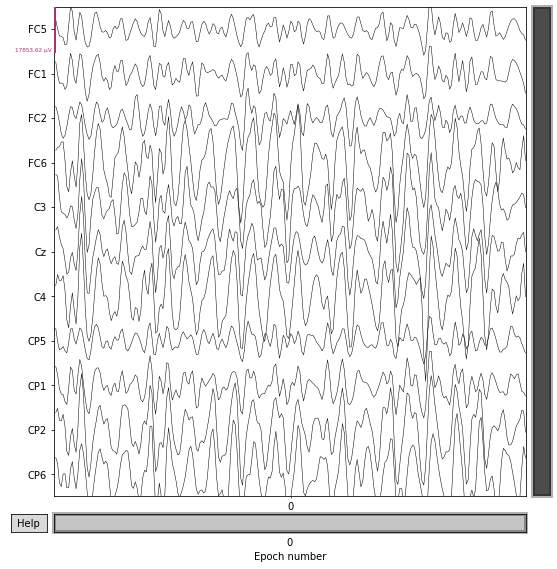

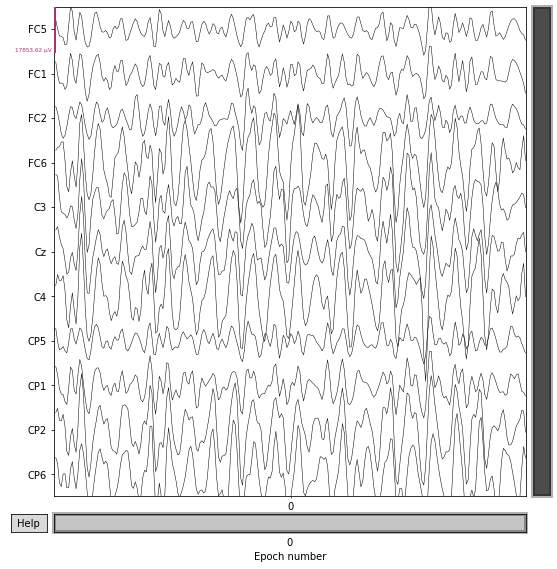

In [ ]:
target_subject_idx = ds_info[(ds_info["subject"] == target_subject) & (ds_info["label"] == "nâng tay trái")].index
non_target_subject_idx = ds_info[(ds_info["subject"] != target_subject) & (ds_info["label"] == "nâng tay trái")].index

ds.datasets[non_target_subject_idx[0]].windows[0].plot(scalings="auto")

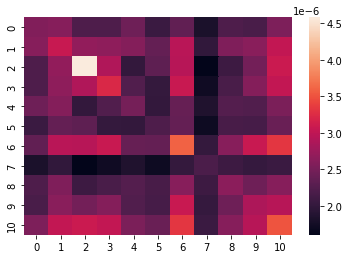

In [ ]:
sb.heatmap(np.cov(ds.datasets[target_subject_idx[0]].windows.get_data().mean(axis=0), rowvar=True))

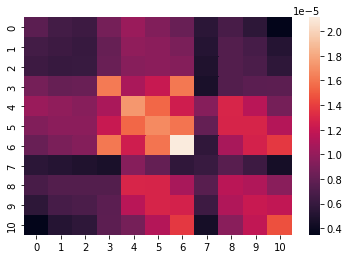

In [ ]:
sb.heatmap(np.cov(ds.datasets[non_target_subject_idx[20]].windows.get_data().mean(axis=0), rowvar=True))

In [16]:
%%time
# labeled_trials = {
#     'gật đầu': [0, 1, 2],
#     'lắc đầu': [0, 1, 2],
#     'nâng chân phải': [0, 1, 2],
#     'nâng chân trái': [0, 1, 2],
#     'nâng tay phải': [0, 1, 2],
#     'nâng tay trái': [0, 1, 2],
#     'rest': [0, 1, 2, 3, 4, 5],
# }
labeled_trials = None

aligned_ds = deepcopy(ds)
# label_alignment(aligned_ds, target_subject=target_subject, labeled_trials=labeled_trials)
euclidean_alignment(aligned_ds, target_subject=None, labeled_trials=None)

subject: 100%|█████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 45.80it/s]

CPU times: user 1.25 s, sys: 35.3 ms, total: 1.29 s
Wall time: 1.29 s


In [17]:
%%time
for _ds in tqdm(aligned_ds.datasets, desc="epochs"):
    _ds.windows.apply_function(np_standardize, channel_wise=False, tdim=2, robust=True)

epochs: 100%|███████████████████████████████████████████████████████████████████████████████████| 482/482 [00:03<00:00, 140.08it/s]

CPU times: user 3.45 s, sys: 0 ns, total: 3.45 s
Wall time: 3.44 s


In [ ]:
x = aligned_ds.datasets[0].windows.get_data()
x.shape

(19, 11, 256)

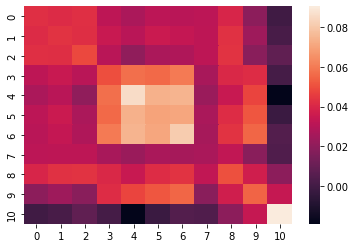

In [ ]:
sb.heatmap(np.cov(aligned_ds.datasets[target_subject_idx[0]].windows.get_data().mean(axis=0), rowvar=True))

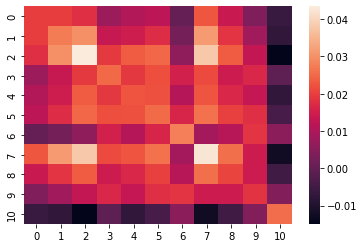

In [ ]:
sb.heatmap(np.cov(aligned_ds.datasets[non_target_subject_idx[20]].windows.get_data().mean(axis=0), rowvar=True))

In [ ]:
aligned_ds.datasets[non_target_subject_idx[0]].windows[0].plot(scalings="auto")

NameError: ignored

In [ ]:
ds.datasets[0].windows.event_id

{'gật đầu': 1,
 'lắc đầu': 2,
 'nâng chân phải': 3,
 'nâng chân trái': 4,
 'nâng tay phải': 5,
 'nâng tay trái': 6,
 'rest': 0}

In [ ]:
from collections import OrderedDict

In [ ]:
state_dict = OrderedDict()
for k, v in torch.load("./MINet-epoch0285-val_acc0.2577-val_f10.1340.ckpt", map_location=device)["state_dict"].items():
    if "conv_classifier" in k:
        continue

    state_dict[k.replace("model.", "")] = v

for k, v in state_dict.items():
    print(f"{k}: {v.size()}")

FileNotFoundError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


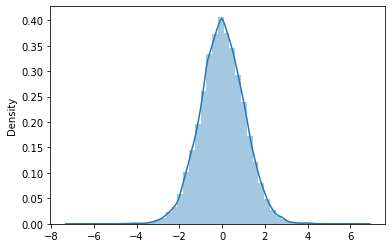

In [203]:
sb.distplot(aligned_ds.datasets[0].windows.get_data())

In [36]:
ds.datasets[0].windows.event_id

{'gật đầu': 0,
 'lắc đầu': 1,
 'nâng chân phải': 2,
 'nâng chân trái': 3,
 'nâng tay phải': 4,
 'nâng tay trái': 5}

In [18]:
# n_classes = 6  # @param
n_classes = len(ds.datasets[0].windows.event_id)
n_remap_channels = None  # @param
window_size = int(128 * window_duration)

# remap_channels = True  # @param {"type": "boolean"}

# base_model = ShallowFBCSPNet(
#     in_chans=n_remap_channels or n_channels,
#     n_classes=n_classes, 
#     input_window_samples=window_size, 
#     n_filters_time=16,
#     n_filters_spat=16,
#     filter_time_length=32,
#     pool_time_length=32,
#     pool_time_stride=16,
#     final_conv_length="auto",
#     drop_prob=0.5,
# )
# base_model = Deep4Net(
#     in_chans=n_remap_channels or n_channels,
#     n_classes=n_classes,
#     input_window_samples=window_size,
#     final_conv_length="auto",
#     pool_time_length=2,
#     pool_time_stride=2,
#     filter_time_length=32,
#     filter_length_2=16,
#     filter_length_3=8,
#     filter_length_4=4,
#     drop_prob=0.25,
# )
base_model = EEGNetv4(
    in_chans=n_remap_channels or n_channels,
    n_classes=n_classes,
    input_window_samples=window_size,
    final_conv_length="auto",
    F1=8,
    D=2,
    F2=16,
    kernel_length=32,
    drop_prob=0.5,
)
# base_model = EEGNet(
#     n_classes=n_classes,
#     in_chans=n_remap_channels or n_channels,
#     in_depth=1,
#     input_window_samples=window_size,
#     final_conv_length="auto",
#     F1=8,
#     D=2,
#     F2=16,
#     F3=16,
#     kernel_lengths=(16, 32, 64,),
#     drop_prob=0.5,
# )
# base_model = TIDNet(
#     in_chans=n_remap_channels or n_channels,
#     n_classes=n_classes,
#     input_window_samples=window_size,
#     s_growth=8,
#     t_filters=16,
#     drop_prob=0.5,
#     pooling=16,
#     temp_layers=3,
#     spat_layers=2,
#     temp_span=0.125,
#     bottleneck=2,
#     summary=-1,
# )
# base_model = MultiResNet(
#     n_classes=n_classes, 
#     n_channels=n_remap_channels or n_channels,
#     n_samples=window_size, 
#     sfreq=128, 
#     ft=8, 
#     fs=16, 
#     res_scales=3, 
#     embedding_size=32, 
#     drop=0.5,
#     use_sep_conv=False,
# )

model = nn.Sequential()
if n_remap_channels is not None:
    model.add_module("dsf", DynamicSpatialBlock(n_in_channels=n_channels, n_out_channels=n_remap_channels, logcov=True, soft_thresh=0.1, drop_prob=0.5))
# model.add_module("attn", SelfAttn(Fc=4, Ft=4))
model.add_module("base", base_model)

init_weights(model, use_xavier=True)

# model.load_state_dict(state_dict, strict=False)

model = model.to(device)
print(f"model:\n{model}")

model:
Sequential(
  (base): EEGNetv4(
    (ensuredims): Ensure4d()
    (dimshuffle): Expression(expression=_transpose_to_b_1_c_0) 
    (conv_temporal): Conv2d(1, 8, kernel_size=(1, 32), stride=(1, 1), padding=(0, 16), bias=False)
    (bnorm_temporal): BatchNorm2d(8, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
    (conv_spatial): Conv2dWithConstraint(8, 16, kernel_size=(32, 1), stride=(1, 1), groups=8, bias=False)
    (bnorm_1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
    (elu_1): Expression(expression=elu) 
    (pool_1): AvgPool2d(kernel_size=(1, 4), stride=(1, 4), padding=0)
    (drop_1): Dropout(p=0.5, inplace=False)
    (conv_separable_depth): Conv2d(16, 16, kernel_size=(1, 16), stride=(1, 1), padding=(0, 8), groups=16, bias=False)
    (conv_separable_point): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bnorm_2): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
    (e

In [19]:
%%time
epochs = 500  # @param
lr = 1e-3  # @param
weight_decay = 1e-4  # @param
batch_size = 256  # @param
smooth = 0.1  # @param
use_augmentation = True  # @param {"type": "boolean"}
use_class_weight = True  # @param {"type": "boolean"}
use_imbalanced_sampler = False  # @param {"type": "boolean"}

n_classes = len(ds.datasets[0].windows.event_id)

train_trials = {
    'gật đầu': [0],
    'lắc đầu': [0],
    'nâng chân phải': [0],
    'nâng chân trái': [0],
    'nâng tay phải': [0],
    'nâng tay trái': [0],
    'rest': [0, 1],
}
valid_trials = {
    'gật đầu': [1, 2],
    'lắc đầu': [1, 2],
    'nâng chân phải': [1, 2],
    'nâng chân trái': [1, 2],
    'nâng tay phải': [1, 2],
    'nâng tay trái': [1, 2],
    'rest': [2, 3, 4, 5],
}

for target_subject in subjects:
    if target_subject == "K314":
        target_subject = "K314_t1"
    elif target_subject == "K324":
        target_subject = "K314_t2"

    print(f"subject: {target_subject}")
    for _ds in aligned_ds.datasets:
        _ds_info = _ds.description
        if _ds_info["subject"].startswith("ALS"):
            _ds_info["split"] = "ignore"
        # elif _ds_info["subject"] == test_subject:
        #     _ds_info["split"] = "ignore"
        elif _ds_info["subject"] == target_subject:
            # _ds_info["split"] = "valid"
            if _ds_info["trial"] in train_trials[_ds_info["label"]]:
                _ds_info["split"] = "valid"
            else:
                _ds_info["split"] = "test"
        else:
            # if _ds_info["trial"] in valid_trials[_ds_info["label"]]:
            #     _ds_info["split"] = "valid"
            # else:
            _ds_info["split"] = "train"

    # aligned_ds_info = aligned_ds.description
    # for i in range(len(aligned_ds.datasets)):
    #     aligned_ds.datasets[i].description["split"] = "train"

    # target_aligned_ds_info = aligned_ds_info[aligned_ds_info["subject"] == target_subject]
    # for i in target_aligned_ds_info.index:
    #     aligned_ds.datasets[i].description["split"] = "ignore"

    # for label, trials in train_trials.items():
    #     for i in target_aligned_ds_info[(target_aligned_ds_info["label"] == label) & (target_aligned_ds_info["trial"].isin(trials))].index:
    #         aligned_ds.datasets[i].description["split"] = "train"

    # for label, trials in valid_trials.items():
    #     for i in target_aligned_ds_info[(target_aligned_ds_info["label"] == label) & (target_aligned_ds_info["trial"].isin(trials))].index:
    #         aligned_ds.datasets[i].description["split"] = "valid"

    # for label, trials in test_trials.items():
    #     for i in target_aligned_ds_info[(target_aligned_ds_info["label"] == label) & (target_aligned_ds_info["trial"].isin(trials))].index:
    #         aligned_ds.datasets[i].description["split"] = "test"

    splitter = aligned_ds.split("split")
    train_ds = splitter["train"]
    valid_ds = splitter["valid"]
    test_ds = splitter["test"]

    y_train = np.concatenate([subjds.y for subjds in train_ds.datasets], axis=0)
    y_valid = np.concatenate([subjds.y for subjds in valid_ds.datasets], axis=0)
    y_test = np.concatenate([subjds.y for subjds in test_ds.datasets], axis=0)
    # print(f"train: {np.bincount(y_train)} - valid: {np.bincount(y_valid)}")
    print(f"train: {np.bincount(y_train)} - valid: {np.bincount(y_valid)} - test: {np.bincount(y_test)}")

    ckpt_dir = f"./ckpt/{model.__class__.__name__}/{target_subject}"
    # ckpt_dir = f"./ckpt/{model.__class__.__name__}/{test_subject}"
    os.makedirs(ckpt_dir, exist_ok=True)

    class_weight = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
    print(f"class_weight: {class_weight}")

    # augmentation
    aug_transforms = [
        # GaussianNoise(
        #     probability=0.5,
        #     std=0.1,
        #     random_state=seed,
        # ),
        # SmoothTimeMask(
        #     probability=0.3,
        #     mask_len_samples=32,
        #     random_state=seed,
        # ),
        # ChannelsDropout(
        #     probability=0.3,
        #     p_drop=0.3,
        #     random_state=seed,
        # ),
        Mixup(
            alpha=0.4,
            beta_per_sample=True,
            random_state=seed,
        ),
    ]

    model = EEGNetv4(
        in_chans=n_channels,
        n_classes=n_classes,
        input_window_samples=256,
        final_conv_length="auto",
        F1=8,
        D=2,
        F2=16,
        kernel_length=32,
        drop_prob=0.5,
    )

    init_weights(model, use_xavier=True)

    # clf = EEGClassifier(
    clf = MixupEEGClassifier(
        model,
        cropped=False,
        ####################
        # criterion=FocalLoss,
        ####################
        criterion=MixUpLoss,
        criterion__criterion_cls=NllLoss,
        ####################
        criterion__smooth=smooth,
        criterion__weight=torch.tensor(class_weight).float().to(device) if use_class_weight else None,
        # criterion__gamma=2.0,
        # optimizer=optim.AdamW,
        optimizer=EAdam,
        optimizer__lr=lr,
        optimizer__weight_decay=weight_decay,
        optimizer__amsgrad=True,
        train_split=predefined_split(valid_ds),
        ####################
        iterator_train=AugmentedDataLoader if use_augmentation else td.DataLoader,
        iterator_train__transforms=aug_transforms if use_augmentation else None,
        iterator_train__shuffle=not use_imbalanced_sampler,
        iterator_train__sampler=ImbalancedDataSampler(train_ds, target_subject=target_subject, target_subject_scale=10.0, other_subjects_scale=1.0) if use_imbalanced_sampler else None,
        iterator_train__pin_memory=True,
        iterator_train__num_workers=os.cpu_count(),
        ####################
        # iterator_train=BalancedMixupDataLoader,
        # iterator_train__loader_cls=AugmentedDataLoader if use_augmentation else td.DataLoader,
        # iterator_train__transforms=aug_transforms if use_augmentation else None,
        # iterator_train__instance_sampler=None,
        # iterator_train__class_sampler=ImbalancedDataSampler(train_ds, target_subject=target_subject, target_subject_scale=10.0, other_subjects_scale=1.0),
        # iterator_train__alpha=0.4,
        # iterator_train__beta_per_sample=True,
        # iterator_train__seed=seed,
        # iterator_train__pin_memory=True,
        # iterator_train__num_workers=os.cpu_count() // 2,  # faster with dual dataloader
        ####################
        batch_size=batch_size,
        callbacks=[
            "balanced_accuracy", 
            "f1_weighted", 
            # "roc_auc_ovr_weighted",  # require "softmax"
            ("lr_scheduler", LRScheduler(policy='CosineAnnealingLR', monitor="train_loss", T_max=epochs)),
            ("early_stopping", EarlyStopping(monitor="valid_loss", patience=50, threshold=1e-4, lower_is_better=True)),
            # ("early_stopping", EarlyStopping(monitor="valid_balanced_accuracy", patience=50, threshold=1e-4, lower_is_better=False)),
            # ("early_stopping", EarlyStopping(monitor="valid_f1_weighted", patience=50, threshold=1e-4, lower_is_better=False)),
            # ("load_state", LoadInitState()),
            # ("freezer", Freezer()),
            # ("linear_weight_initializer", Initializer("*linear*weight", partial(nn.init.kaiming_uniform_, nonlinearity="leaky_relu"))),
            # ("linear_weight_initializer", Initializer("*conv*weight", partial(nn.init.xavier_uniform_, gain=1.0))),
            # ("linear_bias_initializer", Initializer("*linear*bias", nn.init.zeros_)),
            # ("conv_weight_initializer", Initializer("*conv*weight", partial(nn.init.kaiming_uniform_, nonlinearity="leaky_relu"))),
            # ("conv_weight_initializer", Initializer("*conv*weight", partial(nn.init.xavier_uniform_, gain=1.0))),
            # ("conv_bias_initializer", Initializer("*conv*bias", nn.init.zeros_)),
            ("checkpoint", Checkpoint(monitor="valid_balanced_accuracy_best", dirname=ckpt_dir)),
            # ("checkpoint", Checkpoint(monitor="valid_f1_weighted_best", dirname=ckpt_dir)),
            ("last_checkpoint", TrainEndCheckpoint(dirname=ckpt_dir)),
        ],
        device=device,
    )

    # clf.initialize()
    _ = clf.fit(train_ds, y=None, epochs=epochs)

    clf.load_params(
        f_params=f"{ckpt_dir}/params.pt",
        f_optimizer=f"{ckpt_dir}/optimizer.pt",
        f_criterion=f"{ckpt_dir}/criterion.pt",
        f_history=f"{ckpt_dir}/history.json",
    )

    clf.module = clf.module.eval()

    with torch.no_grad():
        y_pred = clf.predict(test_ds)

    y_true = np.concatenate([np.array(_ds.y, dtype=int) for _ds in test_ds.datasets], axis=0)

    print(metrics.balanced_accuracy_score(y_true=y_true, y_pred=y_pred))
    print(metrics.f1_score(y_true=y_true, y_pred=y_pred, average="weighted"))
    print(metrics.classification_report(y_true=y_true, y_pred=y_pred))
    print(metrics.confusion_matrix(y_true=y_true, y_pred=y_pred))

    # break

subject: K300
train: [2455 2481 2449 2451] - valid: [19 19 22 19] - test: [28 40 33 74]
class_weight: [1.00162933 0.99113261 1.0040833  1.00326397]


/home/txdat/code/eeg-motor-imagery/notebooks/eadam.py:96: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  ../torch/csrc/utils/python_arg_parser.cpp:1050.)
  grad.add_(group["weight_decay"], p.data)


  epoch    train_balanced_accuracy    train_f1_weighted    train_loss    valid_balanced_accuracy    valid_f1_weighted    valid_loss    cp      lr     dur
-------  -------------------------  -------------------  ------------  -------------------------  -------------------  ------------  ----  ------  ------
      1                     0.2499               0.1023        1.4412                     0.2500               0.0933        1.3860     +  0.0010  5.1446
      2                     0.2543               0.1287        1.4108                     0.2500               0.0952        1.3853        0.0010  4.9946
      3                     0.2589               0.1658        1.3980                     0.2638               0.1772        1.3839     +  0.0010  5.0750
      4                     0.3382               0.3089        1.3850                     0.1734               0.1452        1.3747        0.0010  5.0565
      5                     0.4151               0.4050        1.3660       

In [51]:
%%time
epochs = 300  # @param
lr = 1e-3  # @param
weight_decay = 1e-4  # @param
batch_size = 256  # @param
smooth = 0.1  # @param
use_augmentation = True  # @param {"type": "boolean"}
use_class_weight = True  # @param {"type": "boolean"}
use_imbalanced_sampler = False  # @param {"type": "boolean"}

n_classes = len(ds.datasets[0].windows.event_id)

train_trials = {
    'gật đầu': [0],
    'lắc đầu': [0],
    'nâng chân phải': [0],
    'nâng chân trái': [0],
    'nâng tay phải': [0],
    'nâng tay trái': [0],
    'rest': [0, 1],
}
valid_trials = {
    'gật đầu': [1, 2],
    'lắc đầu': [1, 2],
    'nâng chân phải': [1, 2],
    'nâng chân trái': [1, 2],
    'nâng tay phải': [1, 2],
    'nâng tay trái': [1, 2],
    'rest': [2, 3, 4, 5],
}

exp_subjects = [
                'K309', 'K311', 'K312', 'K313', 'K315', 
                'K321', 'K314_t2', 'K325', 'K328', 'K336', 
                'K338', 'K339', 'K354', 'K359', 'K362', 
                'K366', 'K368', 'K369', 'K370', 'K373',
                ]

for target_subject in exp_subjects:
    print(f"subject: {target_subject}")
    for _ds in aligned_ds.datasets:
        _ds_info = _ds.description
        if _ds_info["subject"].startswith("ALS"):
            _ds_info["split"] = "ignore"
        # elif _ds_info["subject"] == test_subject:
        #     _ds_info["split"] = "ignore"
        elif _ds_info["subject"] == target_subject:
            # _ds_info["split"] = "valid"
            if _ds_info["trial"] in train_trials[_ds_info["label"]]:
                _ds_info["split"] = "valid"
            else:
                _ds_info["split"] = "test"
        else:
            # if _ds_info["trial"] in valid_trials[_ds_info["label"]]:
            #     _ds_info["split"] = "valid"
            # else:
            _ds_info["split"] = "train"

    # aligned_ds_info = aligned_ds.description
    # for i in range(len(aligned_ds.datasets)):
    #     aligned_ds.datasets[i].description["split"] = "train"

    # target_aligned_ds_info = aligned_ds_info[aligned_ds_info["subject"] == target_subject]
    # for i in target_aligned_ds_info.index:
    #     aligned_ds.datasets[i].description["split"] = "ignore"

    # for label, trials in train_trials.items():
    #     for i in target_aligned_ds_info[(target_aligned_ds_info["label"] == label) & (target_aligned_ds_info["trial"].isin(trials))].index:
    #         aligned_ds.datasets[i].description["split"] = "train"

    # for label, trials in valid_trials.items():
    #     for i in target_aligned_ds_info[(target_aligned_ds_info["label"] == label) & (target_aligned_ds_info["trial"].isin(trials))].index:
    #         aligned_ds.datasets[i].description["split"] = "valid"

    # for label, trials in test_trials.items():
    #     for i in target_aligned_ds_info[(target_aligned_ds_info["label"] == label) & (target_aligned_ds_info["trial"].isin(trials))].index:
    #         aligned_ds.datasets[i].description["split"] = "test"

    splitter = aligned_ds.split("split")
    train_ds = splitter["train"]
    valid_ds = splitter["valid"]
    test_ds = splitter["test"]

    y_train = np.concatenate([subjds.y for subjds in train_ds.datasets], axis=0)
    y_valid = np.concatenate([subjds.y for subjds in valid_ds.datasets], axis=0)
    y_test = np.concatenate([subjds.y for subjds in test_ds.datasets], axis=0)
    # print(f"train: {np.bincount(y_train)} - valid: {np.bincount(y_valid)}")
    print(f"train: {np.bincount(y_train)} - valid: {np.bincount(y_valid)} - test: {np.bincount(y_test)}")

    ckpt_dir = f"./ckpt/{model.__class__.__name__}/{target_subject}"
    # ckpt_dir = f"./ckpt/{model.__class__.__name__}/{test_subject}"
    os.makedirs(ckpt_dir, exist_ok=True)

    class_weight = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
    print(f"class_weight: {class_weight}")

    # augmentation
    aug_transforms = [
        GaussianNoise(
            probability=0.5,
            std=0.1,
            random_state=seed,
        ),
        # SmoothTimeMask(
        #     probability=0.3,
        #     mask_len_samples=32,
        #     random_state=seed,
        # ),
        # ChannelsDropout(
        #     probability=0.3,
        #     p_drop=0.3,
        #     random_state=seed,
        # ),
        Mixup(
            alpha=0.4,
            beta_per_sample=True,
            random_state=seed,
        ),
    ]

    model = EEGNetv4(
        in_chans=n_channels,
        n_classes=n_classes,
        input_window_samples=256,
        final_conv_length="auto",
        F1=8,
        D=2,
        F2=16,
        kernel_length=32,
        drop_prob=0.5,
    )

    init_weights(model, use_xavier=True)

    # clf = EEGClassifier(
    clf = MixupEEGClassifier(
        model,
        cropped=False,
        ####################
        # criterion=FocalLoss,
        ####################
        criterion=MixUpLoss,
        criterion__criterion_cls=NllLoss,
        ####################
        criterion__smooth=smooth,
        criterion__weight=torch.tensor(class_weight).float().to(device) if use_class_weight else None,
        # criterion__gamma=2.0,
        # optimizer=optim.AdamW,
        optimizer=EAdam,
        optimizer__lr=lr,
        optimizer__weight_decay=weight_decay,
        optimizer__amsgrad=True,
        train_split=predefined_split(valid_ds),
        ####################
        iterator_train=AugmentedDataLoader if use_augmentation else td.DataLoader,
        iterator_train__transforms=aug_transforms if use_augmentation else None,
        iterator_train__shuffle=not use_imbalanced_sampler,
        iterator_train__sampler=ImbalancedDataSampler(train_ds, target_subject=target_subject, target_subject_scale=10.0, other_subjects_scale=1.0) if use_imbalanced_sampler else None,
        iterator_train__pin_memory=True,
        iterator_train__num_workers=os.cpu_count(),
        ####################
        # iterator_train=BalancedMixupDataLoader,
        # iterator_train__loader_cls=AugmentedDataLoader if use_augmentation else td.DataLoader,
        # iterator_train__transforms=aug_transforms if use_augmentation else None,
        # iterator_train__instance_sampler=None,
        # iterator_train__class_sampler=ImbalancedDataSampler(train_ds, target_subject=target_subject, target_subject_scale=10.0, other_subjects_scale=1.0),
        # iterator_train__alpha=0.4,
        # iterator_train__beta_per_sample=True,
        # iterator_train__seed=seed,
        # iterator_train__pin_memory=True,
        # iterator_train__num_workers=os.cpu_count() // 2,  # faster with dual dataloader
        ####################
        batch_size=batch_size,
        callbacks=[
            "balanced_accuracy", 
            "f1_weighted", 
            # "roc_auc_ovr_weighted",  # require "softmax"
            ("lr_scheduler", LRScheduler(policy='CosineAnnealingLR', monitor="train_loss", T_max=epochs)),
            ("early_stopping", EarlyStopping(monitor="valid_loss", patience=50, threshold=1e-4, lower_is_better=True)),
            # ("early_stopping", EarlyStopping(monitor="valid_balanced_accuracy", patience=50, threshold=1e-4, lower_is_better=False)),
            # ("early_stopping", EarlyStopping(monitor="valid_f1_weighted", patience=50, threshold=1e-4, lower_is_better=False)),
            # ("load_state", LoadInitState()),
            # ("freezer", Freezer()),
            # ("linear_weight_initializer", Initializer("*linear*weight", partial(nn.init.kaiming_uniform_, nonlinearity="leaky_relu"))),
            # ("linear_weight_initializer", Initializer("*conv*weight", partial(nn.init.xavier_uniform_, gain=1.0))),
            # ("linear_bias_initializer", Initializer("*linear*bias", nn.init.zeros_)),
            # ("conv_weight_initializer", Initializer("*conv*weight", partial(nn.init.kaiming_uniform_, nonlinearity="leaky_relu"))),
            # ("conv_weight_initializer", Initializer("*conv*weight", partial(nn.init.xavier_uniform_, gain=1.0))),
            # ("conv_bias_initializer", Initializer("*conv*bias", nn.init.zeros_)),
            ("checkpoint", Checkpoint(monitor="valid_balanced_accuracy_best", dirname=ckpt_dir)),
            # ("checkpoint", Checkpoint(monitor="valid_f1_weighted_best", dirname=ckpt_dir)),
            ("last_checkpoint", TrainEndCheckpoint(dirname=ckpt_dir)),
        ],
        device=device,
    )

    # clf.initialize()
    _ = clf.fit(train_ds, y=None, epochs=epochs)

    clf.load_params(
        f_params=f"{ckpt_dir}/params.pt",
        f_optimizer=f"{ckpt_dir}/optimizer.pt",
        f_criterion=f"{ckpt_dir}/criterion.pt",
        f_history=f"{ckpt_dir}/history.json",
    )

    clf.module = clf.module.eval()

    with torch.no_grad():
        y_pred = clf.predict(test_ds)

    y_true = np.concatenate([np.array(_ds.y, dtype=int) for _ds in test_ds.datasets], axis=0)

    print(metrics.balanced_accuracy_score(y_true=y_true, y_pred=y_pred))
    print(metrics.f1_score(y_true=y_true, y_pred=y_pred, average="weighted"))
    print(metrics.classification_report(y_true=y_true, y_pred=y_pred))
    print(metrics.confusion_matrix(y_true=y_true, y_pred=y_pred))

    # break

subject: K309
train: [2443 2489 2446 2488] - valid: [21 15 19 21] - test: [38 36 39 35]
class_weight: [1.00961932 0.99096022 1.00838103 0.99135852]
  epoch    train_balanced_accuracy    train_f1_weighted    train_loss    valid_balanced_accuracy    valid_f1_weighted    valid_loss    cp      lr     dur
-------  -------------------------  -------------------  ------------  -------------------------  -------------------  ------------  ----  ------  ------
      1                     0.2499               0.0983        1.4437                     0.2500               0.1196        1.3841     +  0.0010  2.4513
      2                     0.2499               0.0983        1.4150                     0.2500               0.1196        1.3849        0.0010  2.5458
      3                     0.2502               0.0993        1.4013                     0.2500               0.1196        1.3857        0.0010  2.4938
      4                     0.2522               0.1099        1.3952             

KeyError: ignored

In [27]:
# clf.initialize()

# ckpt_dir = ckpt_dir.replace("_ft_run", "")

clf.load_params(
    f_params=f"{ckpt_dir}/params.pt",
    f_optimizer=f"{ckpt_dir}/optimizer.pt",
    f_criterion=f"{ckpt_dir}/criterion.pt",
    f_history=f"{ckpt_dir}/history.json",
)
clf.module = clf.module.eval()

In [172]:
for _ds in aligned_ds.datasets:
    _ds_info = _ds.description
    if _ds_info["subject"] == test_subject:
        _ds_info["split"] = "test"
    elif _ds_info["subject"] == target_subject:
        _ds_info["split"] = "valid"
    else:
        # if _ds_info["trial"] in valid_trials[_ds_info["label"]]:
        #     _ds_info["split"] = "valid"
        # else:
        _ds_info["split"] = "train"

splitter = aligned_ds.split("split")
valid_ds = splitter["valid"]
test_ds = splitter["test"]

In [28]:
with torch.no_grad():
    y_pred = clf.predict(valid_ds)

y_true = np.concatenate([np.array(_ds.y, dtype=int) for _ds in valid_ds.datasets], axis=0)

print(metrics.classification_report(y_true=y_true, y_pred=y_pred))
print(metrics.confusion_matrix(y_true=y_true, y_pred=y_pred))


with torch.no_grad():
    y_pred = clf.predict(test_ds)

y_true = np.concatenate([np.array(_ds.y, dtype=int) for _ds in test_ds.datasets], axis=0)

print(metrics.classification_report(y_true=y_true, y_pred=y_pred))
print(metrics.confusion_matrix(y_true=y_true, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.86      0.55      0.67        22
           1       0.36      1.00      0.53        18
           2       0.00      0.00      0.00        19
           3       0.25      0.12      0.16        17

    accuracy                           0.42        76
   macro avg       0.37      0.42      0.34        76
weighted avg       0.39      0.42      0.35        76

[[12  7  2  1]
 [ 0 18  0  0]
 [ 0 14  0  5]
 [ 2 11  2  2]]
              precision    recall  f1-score   support

           0       0.81      0.55      0.65        53
           1       0.22      0.29      0.25        56
           2       0.47      0.65      0.54        63
           3       0.54      0.32      0.40        62

    accuracy                           0.45       234
   macro avg       0.51      0.45      0.46       234
weighted avg       0.50      0.45      0.46       234

[[29  9 12  3]
 [ 6 16 27  7]
 [ 0 15 41  7]
 [ 1 33  8 20]]


In [203]:
%%time
epochs = 100  # @param
lr = 1e-3  # @param
weight_decay = 0.0  # @param
batch_size = 128  # @param
smooth = 0.1  # @param
use_augmentation = True  # @param {"type": "boolean"}
use_class_weight = True  # @param {"type": "boolean"}
use_imbalanced_sampler = True  # @param {"type": "boolean"}

# train_trials = {
#     'gật đầu': [0],
#     'lắc đầu': [0],
#     'nâng chân phải': [0],
#     'nâng chân trái': [0],
#     'nâng tay phải': [0],
#     'nâng tay trái': [0],
#     'rest': [0],
# }
# valid_trials = {
#     'gật đầu': [1, 2],
#     'lắc đầu': [1, 2],
#     'nâng chân phải': [1, 2],
#     'nâng chân trái': [1, 2],
#     'nâng tay phải': [1, 2],
#     'nâng tay trái': [1, 2],
#     'rest': [1, 2, 3, 4, 5],
# }

target_subject = "K314"
test_subject = "K324"
# test_subject = target_subject

for _ds in aligned_ds.datasets:
    _ds_info = _ds.description
    if _ds_info["subject"] == test_subject:
        _ds_info["split"] = "test"
    # else:
    #     if _ds_info["subject"] == target_subject:
    #         _ds_info["split"] = "valid"

    else:
        _ds_info["split"] = "train"

# aligned_ds_info = aligned_ds.description
# for i in range(len(aligned_ds.datasets)):
#     aligned_ds.datasets[i].description["split"] = "train"

# target_aligned_ds_info = aligned_ds_info[aligned_ds_info["subject"] == target_subject]
# for i in target_aligned_ds_info.index:
#     aligned_ds.datasets[i].description["split"] = "ignore"

# for label, trials in train_trials.items():
#     for i in target_aligned_ds_info[(target_aligned_ds_info["label"] == label) & (target_aligned_ds_info["trial"].isin(trials))].index:
#         aligned_ds.datasets[i].description["split"] = "train"

# for label, trials in valid_trials.items():
#     for i in target_aligned_ds_info[(target_aligned_ds_info["label"] == label) & (target_aligned_ds_info["trial"].isin(trials))].index:
#         aligned_ds.datasets[i].description["split"] = "valid"

# for label, trials in test_trials.items():
#     for i in target_aligned_ds_info[(target_aligned_ds_info["label"] == label) & (target_aligned_ds_info["trial"].isin(trials))].index:
#         aligned_ds.datasets[i].description["split"] = "test"

# splitter = aligned_ds.split("split")
# train_ds = splitter["train"]
# valid_ds = splitter["valid"]
# test_ds = splitter["test"]

for _ds in aligned_test_ds.datasets:
    _ds_info = _ds.description
    if _ds_info["subject"] == test_subject:
        _ds_info["split"] = "test"
    else:
        _ds_info["split"] = "valid"

train_ds = aligned_ds.split("split")["train"]
splitter = aligned_test_ds.split("split")
valid_ds = splitter["valid"]
test_ds = splitter["test"]

y_train = np.concatenate([subjds.y for subjds in train_ds.datasets], axis=0)
y_valid = np.concatenate([subjds.y for subjds in valid_ds.datasets], axis=0)
# y_test = np.concatenate([subjds.y for subjds in test_ds.datasets], axis=0)
print(f"train: {np.bincount(y_train)} - valid: {np.bincount(y_valid)}")
# print(f"train: {np.bincount(y_train)} - valid: {np.bincount(y_valid)} - test: {np.bincount(y_test)}")

# ckpt_dir = f"./ckpt/{model.__class__.__name__}/{target_subject}_ft"
ckpt_dir = f"./ckpt/{model.__class__.__name__}/{test_subject}_ft"
os.makedirs(ckpt_dir, exist_ok=True)

class_weight = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
print(f"class_weight: {class_weight}")

# augmentation
aug_transforms = [
    GaussianNoise(
        probability=0.5,
        std=0.1,
        random_state=seed,
    ),
    # SmoothTimeMask(
    #     probability=0.3,
    #     mask_len_samples=32,
    #     random_state=seed,
    # ),
    # ChannelsDropout(
    #     probability=0.3,
    #     p_drop=0.3,
    #     random_state=seed,
    # ),
    Mixup(
        alpha=0.4,
        beta_per_sample=True,
        random_state=seed,
    ),
]

# for p in clf.module[0].parameters():
#     p.requires_grad = False

# for name, p in clf.module.named_parameters():
#     print(f"{name}: {p.requires_grad}")

# ft_clf = EEGClassifier(
ft_clf = MixupEEGClassifier(
    model,
    cropped=False,
    ####################
    # criterion=FocalLoss,
    ####################
    criterion=MixUpLoss,
    criterion__criterion_cls=FocalLoss,
    ####################
    criterion__smooth=smooth,
    criterion__weight=torch.tensor(class_weight).float().to(device) if use_class_weight else None,
    # criterion__gamma=2.0,
    # optimizer=optim.AdamW,
    optimizer=EAdam,
    optimizer__lr=lr,
    optimizer__weight_decay=weight_decay,
    optimizer__amsgrad=True,
    train_split=predefined_split(valid_ds),
    ####################
    iterator_train=AugmentedDataLoader if use_augmentation else td.DataLoader,
    iterator_train__transforms=aug_transforms if use_augmentation else None,
    iterator_train__shuffle=not use_imbalanced_sampler,
    iterator_train__sampler=ImbalancedDataSampler(train_ds, target_subject=target_subject, target_subject_scale=10.0, other_subjects_scale=1.0) if use_imbalanced_sampler else None,
    iterator_train__pin_memory=True,
    iterator_train__num_workers=os.cpu_count(),
    ####################
    # iterator_train=BalancedMixupDataLoader,
    # iterator_train__loader_cls=AugmentedDataLoader if use_augmentation else td.DataLoader,
    # iterator_train__transforms=aug_transforms if use_augmentation else None,
    # iterator_train__instance_sampler=None,
    # # iterator_train__instance_sampler=ImbalancedDataSampler(train_ds, target_subject=target_subject, target_subject_scale=0.0, other_subjects_scale=1.0),
    # iterator_train__class_sampler=ImbalancedDataSampler(train_ds, target_subject=target_subject, target_subject_scale=1.0, other_subjects_scale=0.0),
    # iterator_train__alpha=0.3,
    # iterator_train__beta_per_sample=True,
    # iterator_train__seed=seed,
    # iterator_train__pin_memory=True,
    # iterator_train__num_workers=os.cpu_count() // 2,  # faster with dual dataloader
    ####################
    batch_size=batch_size,
    callbacks=[
        "balanced_accuracy", 
        "f1_weighted", 
        # "roc_auc_ovr_weighted",  # require "softmax"
        ("lr_scheduler", LRScheduler(policy='CosineAnnealingLR', monitor="train_loss", T_max=epochs)),
        # ("early_stopping", EarlyStopping(monitor="valid_loss", patience=15, threshold=1e-4, lower_is_better=True)),
        # ("early_stopping", EarlyStopping(monitor="valid_f1_weighted", patience=15, threshold=1e-4, lower_is_better=False)),
        # ("load_state", LoadInitState()),
        ("dsf_freezer", Freezer("*dsf*")),
        # ("conv_1s_freezer", Freezer("*conv_1s*")),
        # ("conv_2_freezer", Freezer("*conv_2*")),
        # ("linear_weight_initializer", Initializer("*linear*weight", partial(nn.init.kaiming_uniform_, nonlinearity="leaky_relu"))),
        # ("linear_weight_initializer", Initializer("*conv*weight", partial(nn.init.xavier_uniform_, gain=1.0))),
        # ("linear_bias_initializer", Initializer("*linear*bias", nn.init.zeros_)),
        # ("conv_weight_initializer", Initializer("*conv*weight", partial(nn.init.kaiming_uniform_, nonlinearity="leaky_relu"))),
        # ("conv_weight_initializer", Initializer("*conv*weight", partial(nn.init.xavier_uniform_, gain=1.0))),
        # ("conv_bias_initializer", Initializer("*conv*bias", nn.init.zeros_)),
        ("checkpoint", Checkpoint(monitor="valid_f1_weighted_best", dirname=ckpt_dir)),
        ("last_checkpoint", TrainEndCheckpoint(dirname=ckpt_dir)),
    ],
    device=device,
)

ft_clf.initialize()

# print(list(ft_clf.module.parameters())[0])

ft_clf.load_params(
    f_params=f"{ckpt_dir.replace('_ft', '')}/params.pt",
    f_optimizer=f"{ckpt_dir.replace('_ft', '')}/optimizer.pt",
    f_criterion=f"{ckpt_dir.replace('_ft', '')}/criterion.pt",
    f_history=f"{ckpt_dir.replace('_ft', '')}/history.json",
)

# print(list(ft_clf.module.parameters())[0])

_ = ft_clf.fit(train_ds, y=None, epochs=epochs)

train: [2449 2484 2441 2482] - valid: [58 58 56 66]
class_weight: [1.00612495 0.99194847 1.00942237 0.99274778]
Re-initializing module.
Re-initializing criterion because the following parameters were re-set: criterion_cls, smooth, weight.
Re-initializing optimizer.
  epoch    train_balanced_accuracy    train_f1_weighted    train_loss    valid_balanced_accuracy    valid_f1_weighted    valid_loss    cp      lr     dur
-------  -------------------------  -------------------  ------------  -------------------------  -------------------  ------------  ----  ------  ------
      1                     0.6217               0.6254        0.6606                     0.5429               0.5526        0.6653     +  0.0010  3.6434
      2                     0.6287               0.6305        0.6577                     0.5432               0.5562        0.6462     +  0.0010  3.3186
      3                     0.6323               0.6335        0.6609                     0.5284               0.5388 

In [204]:
# ft_clf.initialize()

ft_clf.load_params(
    f_params=f"{ckpt_dir}/params.pt",
    f_optimizer=f"{ckpt_dir}/optimizer.pt",
    f_criterion=f"{ckpt_dir}/criterion.pt",
    f_history=f"{ckpt_dir}/history.json",
)
ft_clf.module = ft_clf.module.eval()

In [205]:
#              precision    recall  f1-score   support

#            0       0.41      0.58      0.48        53
#            1       0.45      0.71      0.56        56
#            2       0.68      0.27      0.39        63
#            3       0.27      0.19      0.22        62

#     accuracy                           0.43       234
#    macro avg       0.45      0.44      0.41       234
# weighted avg       0.45      0.43      0.41       234

# [[31  0  0 22]
#  [10 40  2  4]
#  [12 27 17  7]
#  [23 21  6 12]]


with torch.no_grad():
    y_pred = ft_clf.predict(test_ds)

y_true = np.concatenate([np.array(_ds.y, dtype=int) for _ds in test_ds.datasets], axis=0)

print(metrics.classification_report(y_true=y_true, y_pred=y_pred))
print(metrics.confusion_matrix(y_true=y_true, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.37      0.55      0.44        53
           1       0.35      0.32      0.33        56
           2       0.37      0.32      0.34        63
           3       0.61      0.48      0.54        62

    accuracy                           0.41       234
   macro avg       0.42      0.42      0.41       234
weighted avg       0.43      0.41      0.41       234

[[29  0 21  3]
 [21 18 11  6]
 [10 23 20 10]
 [19 11  2 30]]


In [37]:
%%time
epochs = 10  # @param
lr = 1e-3  # @param
weight_decay = 0.0  # @param
batch_size = 128  # @param
smooth = 0.1  # @param
use_augmentation = False  # @param {"type": "boolean"}
use_class_weight = True  # @param {"type": "boolean"}
use_imbalanced_sampler = False  # @param {"type": "boolean"}

train_trials = {
    'gật đầu': [0],
    'lắc đầu': [0],
    'nâng chân phải': [0],
    'nâng chân trái': [0],
    'nâng tay phải': [0],
    'nâng tay trái': [0],
    'rest': [0],
}
test_trials = {
    'gật đầu': [1, 2],
    'lắc đầu': [1, 2],
    'nâng chân phải': [1, 2],
    'nâng chân trái': [1, 2],
    'nâng tay phải': [1, 2],
    'nâng tay trái': [1, 2],
    'rest': [1, 2, 3, 4, 5],
}

target_subject = "K314"
test_subject = "K324"
# test_subject = target_subject

# for _ds in aligned_ds.datasets:
#     _ds_info = _ds.description
#     if _ds_info["subject"] == test_subject:
#         _ds_info["split"] = "test"
#     # else:
#     #     if _ds_info["subject"] == target_subject:
#     #         _ds_info["split"] = "valid"

#     else:
#         _ds_info["split"] = "train"

# aligned_ds_info = aligned_ds.description
# for i in range(len(aligned_ds.datasets)):
#     aligned_ds.datasets[i].description["split"] = "train"

# target_aligned_ds_info = aligned_ds_info[aligned_ds_info["subject"] == target_subject]
# for i in target_aligned_ds_info.index:
#     aligned_ds.datasets[i].description["split"] = "ignore"

# for label, trials in train_trials.items():
#     for i in target_aligned_ds_info[(target_aligned_ds_info["label"] == label) & (target_aligned_ds_info["trial"].isin(trials))].index:
#         aligned_ds.datasets[i].description["split"] = "train"

# for label, trials in valid_trials.items():
#     for i in target_aligned_ds_info[(target_aligned_ds_info["label"] == label) & (target_aligned_ds_info["trial"].isin(trials))].index:
#         aligned_ds.datasets[i].description["split"] = "valid"

# for label, trials in test_trials.items():
#     for i in target_aligned_ds_info[(target_aligned_ds_info["label"] == label) & (target_aligned_ds_info["trial"].isin(trials))].index:
#         aligned_ds.datasets[i].description["split"] = "test"

# splitter = aligned_ds.split("split")
# train_ds = splitter["train"]
# valid_ds = splitter["valid"]
# test_ds = splitter["test"]

for _ds in aligned_test_ds.datasets:
    _ds_info = _ds.description
    if _ds_info["subject"] == test_subject:
        if _ds_info["trial"] in train_trials[_ds_info["label"]]:
            _ds_info["split"] = "train"
        else:
            _ds_info["split"] = "test"
    else:
        _ds_info["split"] = "ignore"

# train_ds = aligned_ds.split("split")["train"]
splitter = aligned_test_ds.split("split")
train_ds = splitter["train"]
valid_ds = train_ds
test_ds = splitter["test"]

y_train = np.concatenate([subjds.y for subjds in train_ds.datasets], axis=0)
y_valid = np.concatenate([subjds.y for subjds in valid_ds.datasets], axis=0)
# y_test = np.concatenate([subjds.y for subjds in test_ds.datasets], axis=0)
print(f"train: {np.bincount(y_train)} - valid: {np.bincount(y_valid)}")
# print(f"train: {np.bincount(y_train)} - valid: {np.bincount(y_valid)} - test: {np.bincount(y_test)}")

# ckpt_dir = f"./ckpt/{model.__class__.__name__}/{target_subject}_ft"
ckpt_dir = f"./ckpt/{model.__class__.__name__}/{test_subject}_ft_run"
os.makedirs(ckpt_dir, exist_ok=True)

class_weight = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
print(f"class_weight: {class_weight}")

# augmentation
aug_transforms = [
    GaussianNoise(
        probability=0.5,
        std=0.1,
        random_state=seed,
    ),
    # SmoothTimeMask(
    #     probability=0.3,
    #     mask_len_samples=32,
    #     random_state=seed,
    # ),
    # ChannelsDropout(
    #     probability=0.3,
    #     p_drop=0.3,
    #     random_state=seed,
    # ),
    Mixup(
        alpha=0.4,
        beta_per_sample=True,
        random_state=seed,
    ),
]

# for p in clf.module[0].parameters():
#     p.requires_grad = False

# for name, p in clf.module.named_parameters():
#     print(f"{name}: {p.requires_grad}")

# ft_run_clf = EEGClassifier(
ft_run_clf = MixupEEGClassifier(
    model,
    cropped=False,
    ####################
    # criterion=FocalLoss,
    ####################
    criterion=MixUpLoss,
    criterion__criterion_cls=FocalLoss,
    ####################
    criterion__smooth=smooth,
    criterion__weight=torch.tensor(class_weight).float().to(device) if use_class_weight else None,
    # criterion__gamma=2.0,
    # optimizer=optim.AdamW,
    optimizer=EAdam,
    optimizer__lr=lr,
    optimizer__weight_decay=weight_decay,
    optimizer__amsgrad=True,
    train_split=predefined_split(valid_ds),
    ####################
    iterator_train=AugmentedDataLoader if use_augmentation else td.DataLoader,
    # iterator_train__transforms=aug_transforms if use_augmentation else None,
    iterator_train__shuffle=not use_imbalanced_sampler,
    iterator_train__sampler=ImbalancedDataSampler(train_ds, target_subject=target_subject, target_subject_scale=10.0, other_subjects_scale=1.0) if use_imbalanced_sampler else None,
    iterator_train__pin_memory=True,
    iterator_train__num_workers=os.cpu_count(),
    ####################
    # iterator_train=BalancedMixupDataLoader,
    # iterator_train__loader_cls=AugmentedDataLoader if use_augmentation else td.DataLoader,
    # iterator_train__transforms=aug_transforms if use_augmentation else None,
    # iterator_train__instance_sampler=None,
    # # iterator_train__instance_sampler=ImbalancedDataSampler(train_ds, target_subject=target_subject, target_subject_scale=0.0, other_subjects_scale=1.0),
    # iterator_train__class_sampler=ImbalancedDataSampler(train_ds, target_subject=target_subject, target_subject_scale=1.0, other_subjects_scale=0.0),
    # iterator_train__alpha=0.3,
    # iterator_train__beta_per_sample=True,
    # iterator_train__seed=seed,
    # iterator_train__pin_memory=True,
    # iterator_train__num_workers=os.cpu_count() // 2,  # faster with dual dataloader
    ####################
    batch_size=batch_size,
    callbacks=[
        "balanced_accuracy", 
        "f1_weighted", 
        # "roc_auc_ovr_weighted",  # require "softmax"
        # ("lr_scheduler", LRScheduler(policy='CosineAnnealingLR', monitor="train_loss", T_max=epochs)),
        # ("early_stopping", EarlyStopping(monitor="valid_loss", patience=15, threshold=1e-4, lower_is_better=True)),
        # ("early_stopping", EarlyStopping(monitor="valid_f1_weighted", patience=15, threshold=1e-4, lower_is_better=False)),
        # ("load_state", LoadInitState()),
        ("freezer", Freezer("*attn*")),
        # ("linear_weight_initializer", Initializer("*linear*weight", partial(nn.init.kaiming_uniform_, nonlinearity="leaky_relu"))),
        # ("linear_weight_initializer", Initializer("*conv*weight", partial(nn.init.xavier_uniform_, gain=1.0))),
        # ("linear_bias_initializer", Initializer("*linear*bias", nn.init.zeros_)),
        # ("conv_weight_initializer", Initializer("*conv*weight", partial(nn.init.kaiming_uniform_, nonlinearity="leaky_relu"))),
        # ("conv_weight_initializer", Initializer("*conv*weight", partial(nn.init.xavier_uniform_, gain=1.0))),
        # ("conv_bias_initializer", Initializer("*conv*bias", nn.init.zeros_)),
        ("checkpoint", Checkpoint(monitor="valid_f1_weighted_best", dirname=ckpt_dir)),
        ("last_checkpoint", TrainEndCheckpoint(dirname=ckpt_dir)),
    ],
    device=device,
)

ft_run_clf.initialize()

# print(list(ft_run_clf.module.parameters())[0])

ft_run_clf.load_params(
    f_params=f"{ckpt_dir.replace('_ft_run', '')}/params.pt",
    f_optimizer=f"{ckpt_dir.replace('_ft_run', '')}/optimizer.pt",
    f_criterion=f"{ckpt_dir.replace('_ft_run', '')}/criterion.pt",
    f_history=f"{ckpt_dir.replace('_ft_run', '')}/history.json",
)

# print(list(ft_run_clf.module.parameters())[0])

_ = ft_run_clf.fit(train_ds, y=None, epochs=epochs)

train: [20 18 22 20] - valid: [20 18 22 20]
class_weight: [1.         1.11111111 0.90909091 1.        ]
Re-initializing module.
Re-initializing criterion because the following parameters were re-set: criterion_cls, smooth, weight.
Re-initializing optimizer.
  epoch    train_balanced_accuracy    train_f1_weighted    train_loss    valid_balanced_accuracy    valid_f1_weighted    valid_loss    cp     dur
-------  -------------------------  -------------------  ------------  -------------------------  -------------------  ------------  ----  ------
      1                     0.5319               0.5164        0.6925                     0.5319               0.5164        0.6774     +  0.3597
      2                     0.6486               0.6455        0.6601                     0.6486               0.6455        0.6074     +  0.3535
      3                     0.6889               0.6841        0.6522                     0.6889               0.6841        0.5521     +  0.3486
      4     

In [38]:
# ft_run_clf.initialize()

ft_run_clf.load_params(
    f_params=f"{ckpt_dir}/params.pt",
    f_optimizer=f"{ckpt_dir}/optimizer.pt",
    f_criterion=f"{ckpt_dir}/criterion.pt",
    f_history=f"{ckpt_dir}/history.json",
)
ft_run_clf.module = ft_run_clf.module.eval()

In [39]:
with torch.no_grad():
    y_pred = ft_run_clf.predict(test_ds)

y_true = np.concatenate([np.array(_ds.y, dtype=int) for _ds in test_ds.datasets], axis=0)

print(metrics.classification_report(y_true=y_true, y_pred=y_pred))
print(metrics.confusion_matrix(y_true=y_true, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        33
           1       0.31      0.47      0.37        38
           2       0.33      0.17      0.23        41
           3       0.49      0.40      0.44        42

    accuracy                           0.49       154
   macro avg       0.49      0.51      0.49       154
weighted avg       0.48      0.49      0.47       154

[[33  0  0  0]
 [ 0 18 12  8]
 [ 0 24  7 10]
 [ 6 17  2 17]]


In [ ]:
%%time
aligned_test_ds = deepcopy(test_ds)

for _ds in aligned_test_ds.datasets:
    _ds_info = _ds.description
    if _ds_info["subject"] == "K324" and _ds_info["trial"] in [0]:
        _ds_info["split"] = "train"

euclidean_alignment(aligned_test_ds, target_subject=None, labeled_trials=None)

# for _ds in tqdm(aligned_test_ds.datasets, desc="epochs"):
#     _ds.windows.apply_function(np_standardize, channel_wise=False, tdim=2, robust=False) 

print()
print(aligned_test_ds.description)

subject: 100%|██████████| 2/2 [00:00<00:00, 49.51it/s]


   subject        scenario     event           label  trial  split
0     K314   nâng tay trái  Thinking   nâng tay trái      0  train
1     K314   nâng tay trái  Thinking   nâng tay trái      1  train
2     K314   nâng tay trái  Thinking   nâng tay trái      2  train
3     K314   nâng tay phải  Thinking   nâng tay phải      0  train
4     K314   nâng tay phải  Thinking   nâng tay phải      1  train
5     K314   nâng tay phải  Thinking   nâng tay phải      2  train
6     K314  nâng chân trái  Thinking  nâng chân trái      0  train
7     K314  nâng chân trái  Thinking  nâng chân trái      1  train
8     K314  nâng chân trái  Thinking  nâng chân trái      2  train
9     K314  nâng chân phải  Thinking  nâng chân phải      0  train
10    K314  nâng chân phải  Thinking  nâng chân phải      1  train
11    K314  nâng chân phải  Thinking  nâng chân phải      2  train
12    K324   nâng tay trái  Thinking   nâng tay trái      0  train
13    K324   nâng tay trái  Thinking   nâng tay trái      1  

In [ ]:
ft_splitter = aligned_test_ds.split("split")
ft_train_ds = ft_splitter["train"]
ft_valid_ds = ft_splitter["valid"]

y_train = np.concatenate([subjds.y for subjds in ft_train_ds.datasets], axis=0)
y_valid = np.concatenate([subjds.y for subjds in ft_valid_ds.datasets], axis=0)
print(f"train: {np.bincount(y_train)} - valid: {np.bincount(y_valid)}")

class_weight = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
print(f"class_weight: {class_weight}")

ft_epochs = 50  # @param
ft_lr = 1e-4  # @param

for p in clf.module[0].parameters():
    p.requires_grad = False
for p in clf.module[1].parameters():
    p.requires_grad = False
for p in clf.module[2].conv_1s.parameters():
    p.requires_grad = False
for p in clf.module[2].conv_2.parameters():
    p.requires_grad = False
# for p in clf.module[2].conv_3.parameters():
#     p.requires_grad = False

ft_clf = EEGClassifier(
    clf.module,
    cropped=False,
    criterion=FocalLoss,
    criterion__smooth=smooth,
    criterion__weight=torch.tensor(class_weight).float().to(device) if use_class_weight else None,
    # criterion__gamma=2.0,
    # optimizer=optim.AdamW,
    optimizer=EAdam,
    optimizer__lr=ft_lr,
    optimizer__weight_decay=0.0,
    optimizer__amsgrad=True,
    train_split=predefined_split(valid_ds),
    iterator_train=td.DataLoader,
    iterator_train__shuffle=True,
    iterator_train__sampler=None,
    iterator_train__pin_memory=True,
    iterator_train__num_workers=os.cpu_count(),
    batch_size=batch_size,
    callbacks=[
        "balanced_accuracy", 
        "f1_weighted", 
        # ("lr_scheduler", LRScheduler(policy='CosineAnnealingLR', monitor="train_loss", T_max=ft_epochs)),
        ("checkpoint", Checkpoint(monitor="valid_f1_weighted_best", dirname=ckpt_dir + "_ft")),
        ("last_checkpoint", TrainEndCheckpoint(dirname=ckpt_dir + "_ft")),
    ],
    device=device,
)

_ = ft_clf.fit(ft_train_ds, y=None, epochs=ft_epochs)

train: [78 76 78 86] - valid: [33 38 41 42]
class_weight: [1.01923077 1.04605263 1.01923077 0.9244186 ]
  epoch    train_balanced_accuracy    train_f1_weighted    train_loss    valid_balanced_accuracy    valid_f1_weighted    valid_loss    cp     dur
-------  -------------------------  -------------------  ------------  -------------------------  -------------------  ------------  ----  ------
      1                     0.5720               0.5823        0.7072                     0.5663               0.5763        0.7177     +  0.5479
      2                     0.5749               0.5854        0.6926                     0.5715               0.5831        0.7152     +  0.5464
      3                     0.5810               0.5911        0.7063                     0.5783               0.5891        0.7124     +  0.5519
      4                     0.5773               0.5886        0.7095                     0.5769               0.5903        0.7104     +  0.5513
      5             

In [ ]:
aligned_test_ds.description

,subject,scenario,event,label,trial,split
0,K314,nâng tay trái,Thinking,nâng tay trái,0,train
1,K314,nâng tay trái,Thinking,nâng tay trái,1,train
2,K314,nâng tay trái,Thinking,nâng tay trái,2,train
3,K314,nâng tay phải,Thinking,nâng tay phải,0,train
4,K314,nâng tay phải,Thinking,nâng tay phải,1,train
5,K314,nâng tay phải,Thinking,nâng tay phải,2,train
6,K314,nâng chân trái,Thinking,nâng chân trái,0,train
7,K314,nâng chân trái,Thinking,nâng chân trái,1,train
8,K314,nâng chân trái,Thinking,nâng chân trái,2,train
9,K314,nâng chân phải,Thinking,nâng chân phải,0,train


In [ ]:
# test_ds = splitter["test"]
test_ds = ft_valid_ds

x = np.concatenate([window_ds.windows.get_data() for window_ds in test_ds.datasets], axis=0)
y = list()
for window_ds in test_ds.datasets:
    y.extend(window_ds.y)
y = np.array(y, dtype=int)
x = torch.tensor(x).float().cuda()
x.size()

torch.Size([154, 11, 256])

In [ ]:
ft_clf.module.eval()

with torch.no_grad():
    y_pred = ft_clf.predict(test_ds)

y_pred.shape

(154,)

In [ ]:
test_ds.datasets[0].windows.event_id

{'nâng chân phải': 0,
 'nâng chân trái': 1,
 'nâng tay phải': 2,
 'nâng tay trái': 3}

In [ ]:
np.bincount(y)

array([33, 38, 41, 42])

In [ ]:
# 0.5759613625774632
# 0.7849806627037185
#               precision    recall  f1-score   support

#            0       1.00      0.83      0.91       445
#            1       0.60      0.96      0.74        25
#            2       0.36      1.00      0.53        24
#            3       0.00      0.00      0.00        23
#            4       0.15      0.26      0.19        19
#            5       0.47      0.81      0.59        26
#            6       0.57      0.17      0.27        23

#     accuracy                           0.76       585
#    macro avg       0.45      0.58      0.46       585
# weighted avg       0.85      0.76      0.78       585

# [[368  15  41   6   7   5   3]
#  [  0  24   1   0   0   0   0]
#  [  0   0  24   0   0   0   0]
#  [  0   1   0   0  22   0   0]
#  [  0   0   0  14   5   0   0]
#  [  0   0   0   5   0  21   0]
#  [  0   0   0   0   0  19   4]]

print(metrics.balanced_accuracy_score(y_true=y, y_pred=y_pred))
print(metrics.f1_score(y_true=y, y_pred=y_pred, average="weighted"))
print(metrics.classification_report(y_true=y, y_pred=y_pred))
print(metrics.confusion_matrix(y_true=y, y_pred=y_pred))

0.5351738548144197
0.4898279634097209
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.45      0.45      0.45        38
           2       0.41      0.76      0.53        41
           3       0.42      0.12      0.19        42

    accuracy                           0.52       154
   macro avg       0.55      0.54      0.51       154
weighted avg       0.53      0.52      0.49       154

[[27  0  0  6]
 [ 0 17 20  1]
 [ 1  9 31  0]
 [ 1 12 24  5]]


In [ ]:
x_valid = list()
y_valid = list()

for window_ds in valid_ds.datasets:
    x_valid.append(window_ds.windows.get_data())
    y_valid.append(window_ds.y)

x_valid = np.concatenate(x_valid, axis=0)
y_valid = np.concatenate(y_valid, axis=0)

x_valid.shape, y_valid.shape

((234, 11, 256), (234,))

In [ ]:
with torch.no_grad():
    y_prob = clf.module(torch.tensor(x_valid).float().to(device)).detach().cpu().numpy()
    y_pred = np.argmax(y_prob, axis=1)

y_prob.shape, y_pred.shape

((234, 4), (234,))

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve
from sklearn.preprocessing import label_binarize

In [ ]:
if n_classes == 2:
    one_hot = np.zeros((len(y_valid), 2), dtype=int)
    one_hot[np.arange(len(y_valid)), y_valid] = 1

else:
    one_hot = label_binarize(y_valid, classes=range(n_classes))

nâng chân phải: 0.40043004102955904
nâng chân trái: 0.3892339900248322
nâng tay phải: 0.5750278338916659
nâng tay trái: 0.40144676734986656


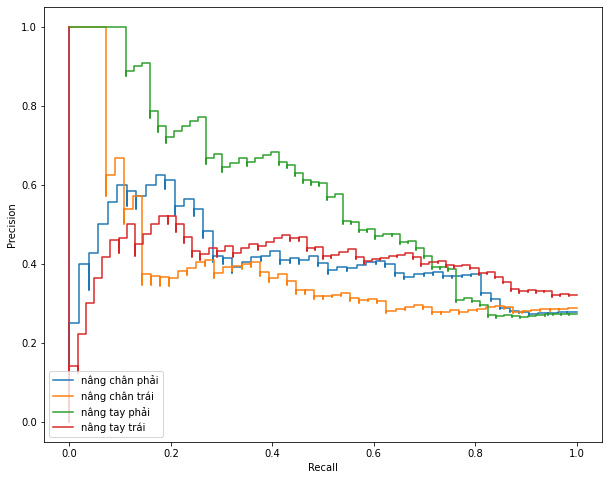

In [ ]:
_, ax = plt.subplots(figsize=(10, 8))

labels = {v: k for k, v in test_ds.datasets[0].windows.event_id.items()}

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(one_hot[:, i], y_prob[:, i])

    print(f"{labels[i]}: {metrics.auc(recall, precision)}")

    display = PrecisionRecallDisplay(recall=recall, precision=precision)
    display.plot(ax=ax, name=f"{labels[i]}")

In [ ]:
spat = clf.module[0]

x = torch.tensor(x_valid).float().to(device)
with torch.no_grad():
    if spat.logcov:
        # compute log-covariance
        # log(C) = Ulog(V)U.T
        xm = x - x.mean(dim=2, keepdim=True)
        cov = torch.matmul(xm, xm.transpose(2, 1)) / (xm.size(2) - 1)

        e, v = torch.linalg.eigh(cov, UPLO="U")
        e = torch.log(torch.clamp(e, min=1e-10))
        log_cov = torch.matmul(
            torch.matmul(v, e.diag_embed()), v.transpose(2, 1)
        )  # [B,C,C]

        feats = log_cov[:, spat.inds[0], spat.inds[1]]  # [B,n_in*(n_in+1)/2]

    else:
        # compute log-variance
        feats = torch.log(torch.var(x, dim=2, unbiased=True))
        feats[torch.isneginf(feats)] = 0

    feats = spat.linear(feats)  # [B,n_out*n_in+n_out]

    w = feats[:, : -spat.n_out_channels].reshape(
        -1, spat.n_out_channels, spat.n_in_channels
    )  # [B,n_out,n_in]
    b = feats[:, -spat.n_out_channels :].reshape(
        -1, spat.n_out_channels, 1
    )  # [B,n_out,1]

    if spat.logcov and spat.soft_thresh > 0:
        # apply soft-thresholding in [-thr,thr]
        w = torch.clamp(w - spat.soft_thresh, min=0) + torch.clamp(
            w + spat.soft_thresh, max=0
        )

    w = w.detach().cpu().numpy()
    b = b.detach().cpu().numpy()

# w.shape, b.shape
w.shape

(234, 11, 11)

In [ ]:
y_valid

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

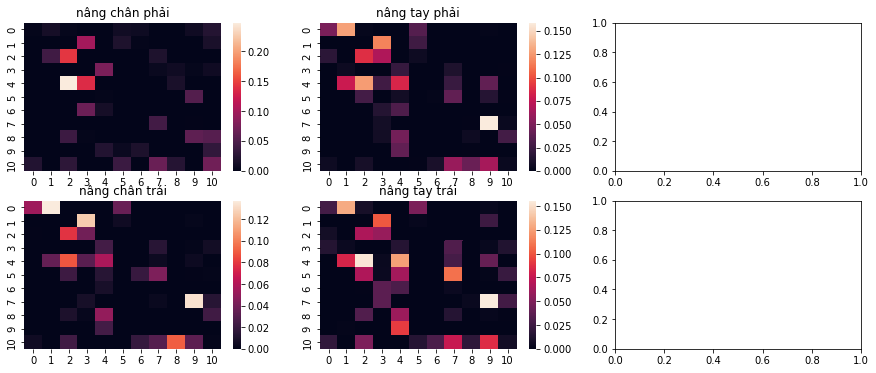

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=len(np.unique(y_valid)) // 2 + 1, figsize=(15,6))

labels = [None for _ in range(len(np.unique(y_valid)))]
for k, v in test_ds.datasets[0].windows.event_id.items():
    labels[v] = k

for i, y in enumerate(np.unique(y_valid)):
    axes[i % 2][i // 2].set_title(labels[i])
    wx = w[np.where(y_valid == y)[0]]
    wx[wx < 0] = 0
    sb.heatmap(wx.mean(axis=0), ax=axes[i % 2][i // 2])

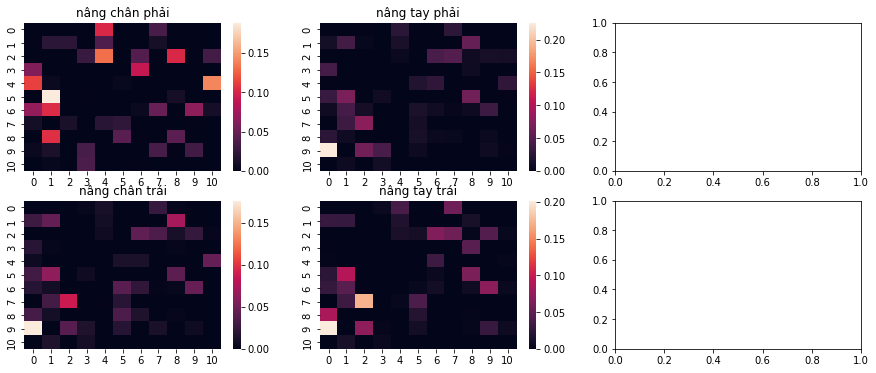

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=len(np.unique(y_valid)) // 2 + 1, figsize=(15,6))

labels = [None for _ in range(len(np.unique(y_valid)))]
for k, v in test_ds.datasets[0].windows.event_id.items():
    labels[v] = k

for i, y in enumerate(np.unique(y_valid)):
    axes[i % 2][i // 2].set_title(labels[i])
    wx = w[np.where(y_valid == y)[0]]
    wx[wx > 0] = 0
    wx = np.abs(wx)
    sb.heatmap(wx.mean(axis=0), ax=axes[i % 2][i // 2])

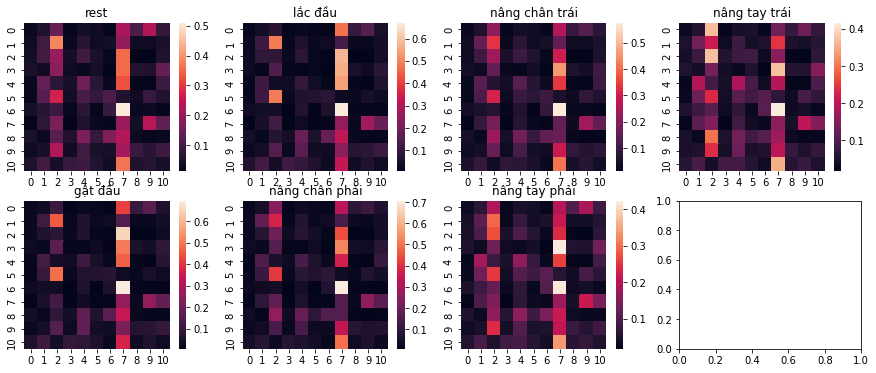

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=len(np.unique(y_valid)) // 2 + 1, figsize=(15,6))

labels = [None for _ in range(len(np.unique(y_valid)))]
for k, v in test_ds.datasets[0].windows.event_id.items():
    labels[v] = k

for i, y in enumerate(np.unique(y_valid)):
    axes[i % 2][i // 2].set_title(labels[i])
    sb.heatmap(w[np.where(y_valid == y)[0]].mean(axis=0), ax=axes[i % 2][i // 2])

In [ ]:
channels

['FC5', 'FC1', 'FC2', 'FC6', 'C3', 'Cz', 'C4', 'CP5', 'CP1', 'CP2', 'CP6']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

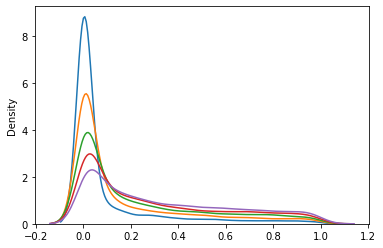

In [ ]:
for alpha in [0.1, 0.2, 0.3, 0.4, 0.5]:
    lam = np.array([np.random.beta(alpha, 1.0) for _ in range(10000)], dtype=np.float32)

    sb.distplot(lam, hist=False)

In [ ]:
x = ds.datasets[0].windows.get_data()
x.shape

(10, 11, 256)

In [ ]:
# xm = x - x.mean(axis=2, keepdims=True)
# cov = xm @ xm.transpose((0, 2, 1)) / (xm.shape[2] - 1)

cov = np.stack([np.cov(xi, rowvar=True) for xi in x])

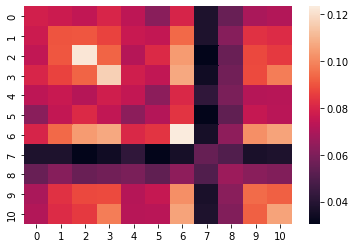

In [ ]:
sb.heatmap(cov[0] / np.trace(cov[0]))

In [ ]:
corr = np.stack([np.corrcoef(xi, rowvar=True) for xi in x])

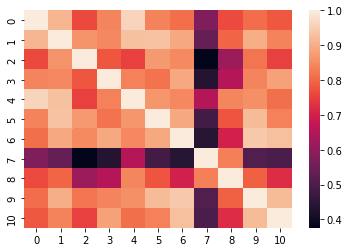

In [ ]:
sb.heatmap(corr[0])

In [ ]:
x1 = (x - x.mean(axis=2, keepdims=True)) / x.std(axis=2, keepdims=True)

# x1m = x1 - x1.mean(axis=2, keepdims=True)
# cov1 = x1m @ x1m.transpose((0, 2, 1)) / (x1m.shape[2] - 1)

cov1 = np.stack([np.cov(xi, rowvar=True) for xi in x1])

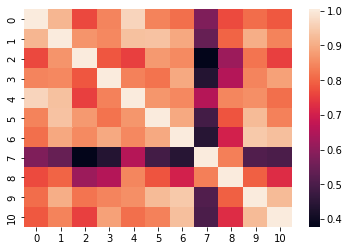

In [ ]:
sb.heatmap(cov1[0])

In [ ]:
cov[0] / cov1[0]

array([[2.90265432e-05, 3.10976515e-05, 3.61713357e-05, 3.53591970e-05,
        2.83470910e-05, 2.76946171e-05, 3.63536662e-05, 2.43071579e-05,
        2.66919424e-05, 3.18293418e-05, 3.37158701e-05],
       [3.10976515e-05, 3.33165380e-05, 3.87522408e-05, 3.78821542e-05,
        3.03697189e-05, 2.96706896e-05, 3.89475810e-05, 2.60415276e-05,
        2.85964717e-05, 3.41004360e-05, 3.61215723e-05],
       [3.61713357e-05, 3.87522408e-05, 4.50747964e-05, 4.40627523e-05,
        3.53246384e-05, 3.45115602e-05, 4.53020070e-05, 3.02902885e-05,
        3.32620802e-05, 3.96640343e-05, 4.20149256e-05],
       [3.53591970e-05, 3.78821542e-05, 4.40627523e-05, 4.30734311e-05,
        3.45315102e-05, 3.37366877e-05, 4.42848614e-05, 2.96101943e-05,
        3.25152616e-05, 3.87734756e-05, 4.10715834e-05],
       [2.83470910e-05, 3.03697189e-05, 3.53246384e-05, 3.45315102e-05,
        2.76835434e-05, 2.70463426e-05, 3.55027009e-05, 2.37381768e-05,
        2.60671384e-05, 3.10842818e-05, 3.29266502e-

In [ ]:
for i in range(len(wm)):
    print(f"{i}: {[channels[j] for j in np.argsort(wm[i])[::-1]]}")

0: ['C3', 'P3', 'P7', 'F8', 'Pz', 'T7', 'FT9', 'Fp1', 'Fz', 'F4', 'O2', 'F3', 'FC5', 'Fp2', 'PO10', 'F7', 'CP6', 'P8', 'FT10', 'FC1', 'C4', 'P4', 'CP2', 'FC2', 'CP1', 'Cz', 'CP5', 'FC6', 'PO9', 'O1', 'Oz', 'T8']
1: ['O1', 'Pz', 'C4', 'CP5', 'Fp2', 'P8', 'F7', 'PO10', 'FC2', 'P7', 'F4', 'F3', 'Oz', 'T7', 'PO9', 'F8', 'O2', 'T8', 'Fp1', 'FC5', 'P3', 'Fz', 'FC6', 'P4', 'FT9', 'CP1', 'C3', 'FC1', 'FT10', 'Cz', 'CP2', 'CP6']
2: ['P4', 'O1', 'Fp1', 'Pz', 'C4', 'F7', 'PO9', 'FC2', 'P3', 'F8', 'C3', 'P7', 'PO10', 'Fz', 'CP2', 'F3', 'FC6', 'FT9', 'O2', 'T7', 'FC1', 'Oz', 'CP1', 'CP6', 'FT10', 'T8', 'Cz', 'P8', 'FC5', 'CP5', 'F4', 'Fp2']
3: ['P8', 'P4', 'FT9', 'F8', 'FT10', 'CP1', 'F3', 'PO10', 'P7', 'T8', 'Pz', 'CP2', 'FC6', 'Fz', 'T7', 'FC5', 'Oz', 'O1', 'C4', 'CP6', 'PO9', 'F7', 'P3', 'Cz', 'F4', 'CP5', 'FC1', 'Fp1', 'Fp2', 'FC2', 'O2', 'C3']
4: ['CP1', 'Fp1', 'P8', 'FC6', 'PO10', 'FC1', 'FC2', 'CP2', 'P7', 'FT10', 'P4', 'T7', 'Pz', 'PO9', 'Oz', 'T8', 'C4', 'Cz', 'C3', 'F7', 'FC5', 'F8', 'CP5

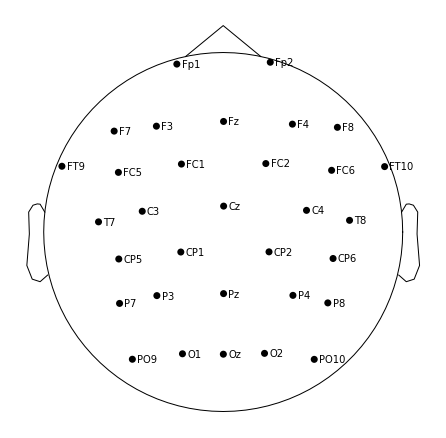

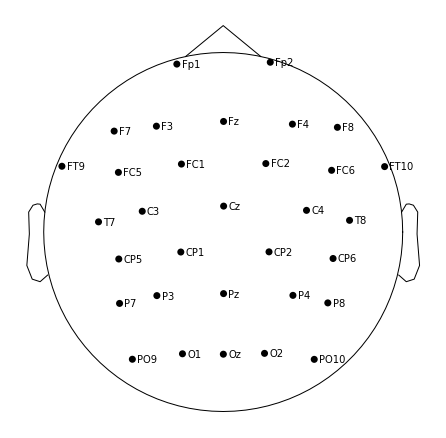

In [ ]:
valid_ds.datasets[0].windows.plot_sensors(show_names=True)

In [ ]:
labels = [None for _ in range(n_classes)]

for k, v in valid_ds.datasets[0].windows.event_id.items():
    labels[v] = k

labels

['other',
 'gật đầu',
 'lắc đầu',
 'nâng chân phải',
 'nâng chân trái',
 'nâng tay phải',
 'nâng tay trái']

In [ ]:
target_ds = load_subject_data(
    f"{data_dir}/{target_subject}",  
    scenarios=[
        "nâng tay trái",
        "nâng tay phải",
        "nâng chân trái",
        "nâng chân phải",
        "gật đầu",
        "lắc đầu",
        # "há miệng",
    ],
    events=events,
    channels=channels,
    label_mapping=label_mapping,
    minimal_trial_duration=minimal_trial_duration,
    window_duration=window_duration, 
    window_stride_duration=window_stride_duration, 
    start_offset=0,
    stop_offset=0,
    fmin=fmin, 
    fmax=fmax, 
    resample=None,
    return_raw=False,
    return_preprocessed=True,
    preload=True,
)

target_ds_info = target_ds.description
target_ds_info

sample: 100%|██████████| 9/9 [00:00<00:00, 54.91it/s]


,scenario
0,nâng tay trái
1,nâng tay phải
2,nâng chân trái
3,nâng chân phải
4,gật đầu
5,lắc đầu


In [ ]:
def compute_transform_mat(
    X: np.ndarray, use_log: bool = False, inv: bool = True
) -> np.ndarray:
    """
    compute transform matrix (inv) sqrt of mean of covariances over trials

    Parameters
    ---------------------
    X   np.ndarray
        trials' data [bsz, channels, times]
    use_log     bool
        use log-euclidean metric or euclidean metric (default)
    inv     bool
        compute inverse of matrix (R^-1)

    Return
    ---------------------
    R   np.ndarray
        transform matrix [1, channels, channels]
    """
    assert X.ndim == 3, f"invalid input's ndim {X.ndim} isn't equal 3"

    C = X @ X.transpose((0, 2, 1))  # [bsz, channels, channels]
    if use_log:
        # TODO: log-euclidean mean doesn't ensure X @ X.T = I
        C = linalg.expm(np.mean(np.stack([linalg.logm(Ci) for Ci in C]), axis=0))
    else:
        C = np.mean(C, axis=0)

    if inv:
        R = linalg.inv(linalg.sqrtm(C))
        if np.iscomplexobj(R):
            R = np.real(R).astype(np.float32)
    else:
        R = linalg.sqrtm(C)

    return R[np.newaxis]


def euclidean_alignment_np(X: np.ndarray) -> np.ndarray:
    """
    align subject's trials data domain
    after transform, X @ X.T = I

    Parameters
    ---------------------
    X   np.ndarray
        trials' data [bsz, channels, times]

    Return
    ---------------------
    X   np.ndarray
        aligned trials' data
    """
    return compute_transform_mat(X) @ X

In [ ]:
window_stride = int(128 * window_stride_duration)

xs = list()
for raw_ds in target_ds.datasets:
    i = 0
    j = window_size
    x = raw_ds.raw.get_data()
    xs_raw = list()
    while j < x.shape[1]:
        xs_raw.append(x[:, i: j])
        i += window_stride
        j += window_stride

    xs.append(np.array(xs_raw, dtype=np.float32))

r = compute_transform_mat(np.concatenate(xs, axis=0))

In [ ]:
x = r @ xs[4]

x = torch.tensor(x).float().cuda()
x.size()

torch.Size([528, 32, 256])

In [ ]:
with torch.no_grad():
    prob = torch.exp(clf.module(x)).cpu().numpy()

prob = np.tile(prob[:, :, None], (1, 1, window_size)).transpose((0, 2, 1)).reshape((-1, n_classes))
prob.shape

(135168, 5)

In [ ]:
plt.rcParams['figure.figsize'] = [18, 10]

In [ ]:
annot = pd.DataFrame(raw.annotations)
events = mne.events_from_annotations(raw)[0]
annot["event"] = events[:, -1]
annot["onset_point"] = 0
annot["offset_point"] = 0
for i, r in annot.iterrows():
    annot.loc[i, "onset_point"] = int(128 * r["onset"])
    annot.loc[i, "offset_point"] = int(128 * (r["onset"] + r["duration"]))

annot

,onset,duration,description,orig_time,event,onset_point,offset_point
0,7.6669,7.0473,Thinking,2021-10-18 16:12:21+00:00,2,981,1883
1,14.7153,6.2803,Resting,2021-10-18 16:12:21+00:00,1,1883,2687
2,20.9956,8.2471,Thinking and Acting,2021-10-18 16:12:21+00:00,3,2687,3743
3,29.2437,5.7646,Resting,2021-10-18 16:12:21+00:00,1,3743,4481
4,35.0082,6.1645,Thinking,2021-10-18 16:12:21+00:00,2,4481,5270
5,41.1727,5.9817,Resting,2021-10-18 16:12:21+00:00,1,5270,6035
6,47.1554,7.2455,Thinking and Acting,2021-10-18 16:12:21+00:00,3,6035,6963
7,54.4019,5.3167,Resting,2021-10-18 16:12:21+00:00,1,6963,7643
8,59.7186,6.3457,Thinking,2021-10-18 16:12:21+00:00,2,7643,8456
9,66.0653,6.3800,Resting,2021-10-18 16:12:21+00:00,1,8456,9272


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


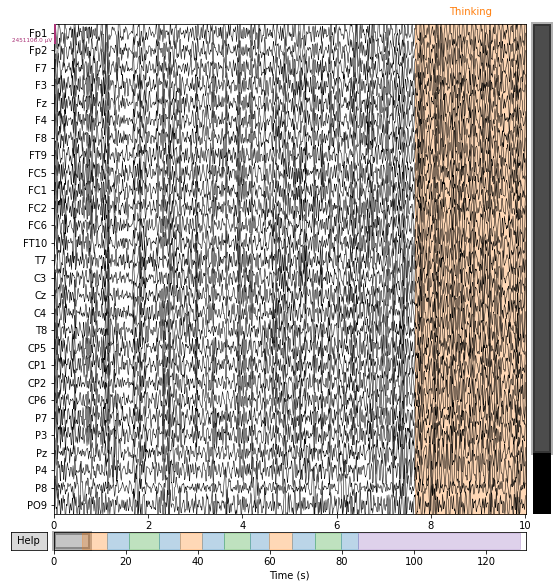

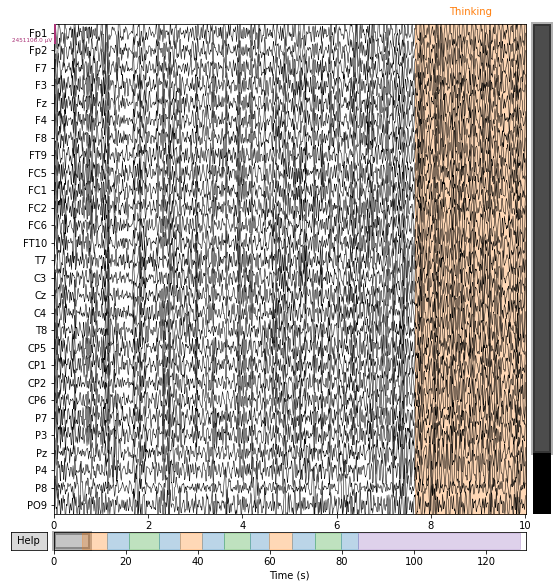

In [ ]:
raw.plot(n_channels=28, scalings="auto")

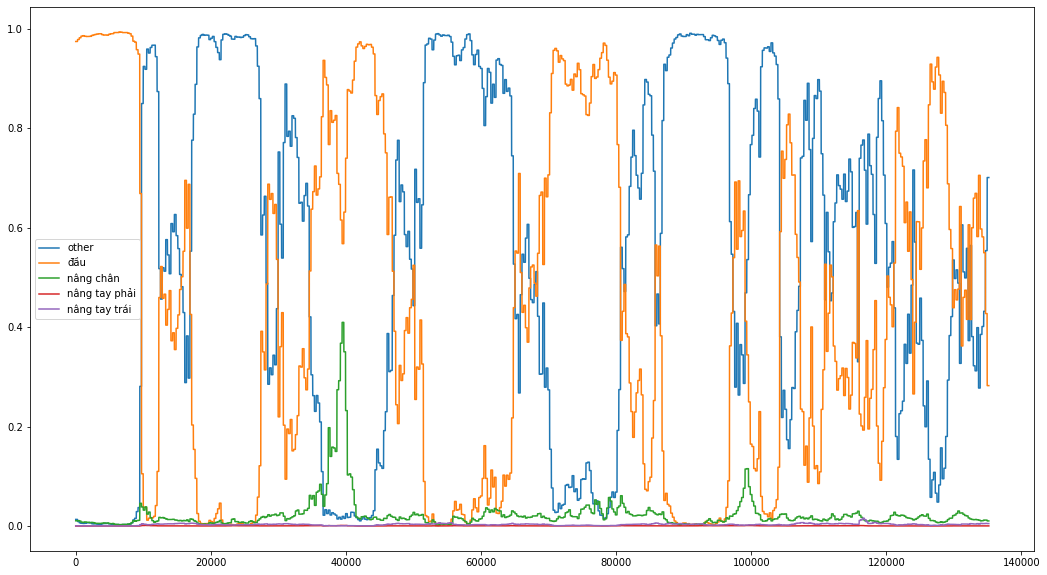

In [ ]:
# for _, r in annot.iterrows():
#     plt.axvspan(r["onset_point"], r["offset_point"])

for i in range(prob.shape[1]):
    plt.plot(np.arange(len(prob)), prob[:, i])

plt.legend(labels)

In [ ]:
spat = model[0]

with torch.no_grad():
    cov = torch.matmul(x, x.transpose(2, 1)) / (x.size(2) - 1)
    e, v = torch.linalg.eigh(cov, UPLO="U")
    e = torch.log(torch.clamp(e, min=1e-10))
    log_cov = torch.matmul(torch.matmul(v, e.diag_embed()), v.transpose(2, 1))  # [B,C,C]

    wb = log_cov[:, spat.inds[0], spat.inds[1]]  # [B,w_dim]

    # # compute log-variance
    # wb = torch.log(torch.var(x, dim=2, unbiased=True))
    # wb[torch.isneginf(wb)] = 0

    wb = spat.linear(wb)  # [B,w_out]

    w = wb[:, : -spat.n_out_channels].reshape(-1, spat.n_out_channels, spat.n_in_channels)
    b = wb[:, -spat.n_out_channels :].reshape(-1, spat.n_out_channels, 1)

    # apply soft-thresholding in [-thr,thr]
    w = torch.clamp(w - spat.thr, min=0) + torch.clamp(w + spat.thr, max=0)
    w = w.cpu().numpy()

w.shape

(224, 8, 28)

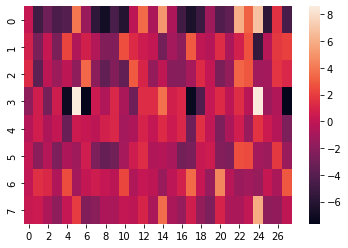

In [ ]:
sb.heatmap(w[np.where(y == 2)[0]].mean(axis=0))

In [ ]:
import time
from datetime import timedelta

In [ ]:
%%time
n_classes = 7  # @param
n_remap_channels = 4  # @param
remap_channels = True  # @param {"type": "boolean"}

window_size = int(128 * window_duration)

epochs = 100  # @param
lr = 1e-3  # @param
weight_decay = 0.0  # @param
batch_size = 2048  # @param
smooth = 0.0  # @param
use_augmentation = True  # @param {"type": "boolean"}
use_class_weight = True  # @param {"type": "boolean"}
use_imbalanced_sampler = False  # @param {"type": "boolean"}

# augmentation
aug_transforms = [
    ChannelsDropout(
        probability=0.2,
        p_drop=0.2,
        random_state=seed,
    ),
    # SmoothTimeMask(
    #     probability=0.2,
    #     mask_len_samples=64,
    #     random_state=seed,
    # ),
    SmoothTimeMask(
        probability=0.2,
        mask_len_samples=32,
        random_state=seed,
    ),
    GaussianNoise(
        probability=0.5,
        std=0.1,
        random_state=seed,
    ),
]

results = list()
for target_subject in subjects[11:20]:
    print("*" * 50)
    print(f"fitting {target_subject}...")
    print("*" * 50)

    t = time.time()

    # -----------------------------------
    # init data
    # -----------------------------------
    labeled_trials = [0]

    aligned_ds = deepcopy(ds)
    label_alignment(aligned_ds, target_subject=target_subject, labeled_trials=labeled_trials)
    # euclidean_alignment(aligned_ds, target_subject=target_subject, labeled_trials=None)

    for _ds in aligned_ds.datasets:
        _ds.windows.apply_function(np_standardize, channel_wise=False, tdim=2)

    aligned_ds_info = aligned_ds.description
    for i in range(len(aligned_ds.datasets)):
        aligned_ds.datasets[i].description["split"] = "train"

    # for i in aligned_ds_info[(aligned_ds_info["subject"] == target_subject)].index:
    #     aligned_ds.datasets[i].description["split"] = "valid"

    for i in aligned_ds_info[(aligned_ds_info["subject"] == target_subject) & (~aligned_ds_info["trial"].isin(labeled_trials))].index:
        aligned_ds.datasets[i].description["split"] = "valid"

    # ignore target subject's resting trials
    for i in aligned_ds_info[(aligned_ds_info["subject"] == target_subject) & (aligned_ds_info["label"] == "other") & (aligned_ds_info["trial"] > 2)].index:
        aligned_ds.datasets[i].description["split"] = "other"

    # get first resting trial
    for i in aligned_ds_info[(aligned_ds_info["subject"] != target_subject) & (aligned_ds_info["label"] == "other") & (aligned_ds_info["trial"] > 0)].index:
        aligned_ds.datasets[i].description["split"] = "other"

    splitter = aligned_ds.split("split")
    train_ds = splitter["train"]
    valid_ds = splitter["valid"]
    # test_ds = splitter["test"]

    y_train = np.concatenate([subjds.y for subjds in train_ds.datasets], axis=0)
    y_valid = np.concatenate([subjds.y for subjds in valid_ds.datasets], axis=0)
    # y_test = np.concatenate([subjds.y for subjds in test_ds.datasets], axis=0)
    print(f"train: {np.bincount(y_train)} - valid: {np.bincount(y_valid)}")
    # print(f"train: {np.bincount(y_train)} - valid: {np.bincount(y_valid)} - test: {np.bincount(y_test)}")

    # ----------------------------------
    # init model
    # ----------------------------------

    # model = ShallowFBCSPNet(
    #     in_chans=n_remap_channels if remap_channels else n_channels, 
    #     n_classes=n_classes, 
    #     input_window_samples=window_size, 
    #     n_filters_time=32,
    #     n_filters_spat=64,
    #     filter_time_length=32,
    #     pool_time_length=64,
    #     pool_time_stride=16,
    #     final_conv_length="auto",
    #     drop_prob=0.25,
    # )
    # model = Deep4Net(
    #     in_chans=n_remap_channels if remap_channels else n_channels,
    #     n_classes=n_classes,
    #     input_window_samples=window_size,
    #     final_conv_length="auto",
    #     pool_time_length=2,
    #     pool_time_stride=2,
    #     filter_time_length=32,
    #     filter_length_2=16,
    #     filter_length_3=8,
    #     filter_length_4=4,
    #     drop_prob=0.25,
    # )
    model = EEGNetv4(
        in_chans=n_remap_channels if remap_channels else n_channels,
        n_classes=n_classes,
        input_window_samples=window_size,
        final_conv_length="auto",
        F1=8,
        F2=16,
        kernel_length=32,
        drop_prob=0.25,
    )
    # model = MultiResNet(
    #     n_classes=n_classes, 
    #     n_channels=n_remap_channels if remap_channels else n_channels, 
    #     n_samples=window_size, 
    #     sfreq=128, 
    #     ft=8, 
    #     fs=16, 
    #     res_scales=3, 
    #     embedding_size=32, 
    #     drop=0.25,
    #     use_sep_conv=False,
    # )

    if remap_channels:
        model = nn.Sequential(
            DynamicSpatialBlock(n_in_channels=n_channels, n_out_channels=n_remap_channels, drop=0.25),
            model,
        )

    init_weights(model)
    model = model.to(device)

    # ----------------------------------
    # fitting
    # ----------------------------------

    ckpt_dir = f"./ckpt/{model.__class__.__name__}/{target_subject}"
    os.makedirs(ckpt_dir, exist_ok=True)

    class_weight = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
    print(f"class_weight: {class_weight}")

    clf = EEGClassifier(
        model,
        cropped=False,
        # criterion=nn.NLLLoss,
        criterion=FocalLoss,
        criterion__smooth=smooth,
        criterion__weight=torch.tensor(class_weight).float().to(device) if use_class_weight else None,
        criterion__gamma=2.0,
        optimizer=optim.AdamW,
        # optimizer=EAdam,
        optimizer__lr=lr,
        optimizer__weight_decay=weight_decay,
        optimizer__amsgrad=True,
        train_split=predefined_split(valid_ds),
        iterator_train=AugmentedDataLoader if use_augmentation else td.DataLoader,
        iterator_train__transforms=aug_transforms if use_augmentation else None,
        iterator_train__shuffle=not use_imbalanced_sampler,
        iterator_train__sampler=ImbalancedDataSampler(train_ds) if use_imbalanced_sampler else None,
        iterator_train__pin_memory=True,
        iterator_train__num_workers=os.cpu_count(),
        batch_size=batch_size,
        callbacks=[
            "balanced_accuracy", 
            "f1_weighted", 
            ("lr_scheduler", LRScheduler(policy='CosineAnnealingLR', monitor="train_loss", T_max=epochs)),
            # ("early_stopping", EarlyStopping(monitor="valid_loss", patience=15, threshold=1e-4, lower_is_better=True)),
            ("early_stopping", EarlyStopping(monitor="valid_f1_weighted", patience=15, threshold=1e-4, lower_is_better=False)),
            # ("load_state", LoadInitState()),
            # ("freezer", Freezer()),
            ("weight_initializer", Initializer("*conv*weight", partial(nn.init.kaiming_uniform_, nonlinearity="leaky_relu"))),
            # ("weight_initializer", Initializer("*conv*weight", partial(nn.init.xavier_uniform_, gain=1.0))),
            ("checkpoint", Checkpoint(monitor="valid_f1_weighted_best", dirname=ckpt_dir)),
            ("last_checkpoint", TrainEndCheckpoint(dirname=ckpt_dir)),
        ],
        device=device,
    )

    _ = clf.fit(train_ds, y=None, epochs=epochs)

    # ----------------------------------
    # evaluating
    # ----------------------------------

    clf.load_params(
        f_params=f"{ckpt_dir}/params.pt",
        f_optimizer=f"{ckpt_dir}/optimizer.pt",
        f_criterion=f"{ckpt_dir}/criterion.pt",
        f_history=f"{ckpt_dir}/history.json",
    )
    clf.module = clf.module.eval()

    x = np.concatenate([window_ds.windows.get_data() for window_ds in valid_ds.datasets], axis=0)
    x = torch.tensor(x).float().cuda()

    y = list()
    for window_ds in valid_ds.datasets:
        y.extend(window_ds.y)
    y = np.array(y, dtype=int)

    with torch.no_grad():
        # y_pred = clf.predict(valid_ds)
        y_prob = clf.module(x).detach().cpu().numpy()
        y_pred = np.argmax(y_prob, axis=1)
    
    acc = metrics.balanced_accuracy_score(y_true=y, y_pred=y_pred)
    f1 = metrics.f1_score(y_true=y, y_pred=y_pred, average="weighted")
    print(f"acc: {acc} - f1: {f1}")
    print(metrics.classification_report(y_true=y, y_pred=y_pred))
    print(metrics.confusion_matrix(y_true=y, y_pred=y_pred))

    results.append((target_subject, acc, f1))

    print("*" * 50)
    print(f"fitting {target_subject} done - time: {timedelta(seconds=time.time() - t)}s")
    print("*" * 50)

    del aligned_ds
    del model
    del clf

**************************************************
fitting K322...
**************************************************


subject: 100%|██████████| 45/45 [00:09<00:00,  4.88it/s]


train: [5572 3454 3393 3490 3500 3533 3563] - valid: [79 42 44 46 41 44 45]
class_weight: [0.67954569 1.09624452 1.11595301 1.08493655 1.08183673 1.07173183
 1.06270799]
  epoch    train_balanced_accuracy    train_f1_weighted    train_loss    valid_balanced_accuracy    valid_f1_weighted    valid_loss    cp      lr      dur
-------  -------------------------  -------------------  ------------  -------------------------  -------------------  ------------  ----  ------  -------
      1                     0.3085               0.2239        1.3963                     0.2140               0.1479        1.5922     +  0.0010  24.9242
      2                     0.6694               0.5756        1.0768                     0.3555               0.2849        1.1069     +  0.0010  24.3312
      3                     0.8739               0.8356        0.6486                     0.5701               0.5321        0.8509     +  0.0010  24.3165
      4                     0.9543               0.9346

KeyboardInterrupt: ignored

In [ ]:
# K325  0.5990               0.5260        0.7989
# K325  0.6334               0.5675        0.5153

In [ ]:
# 'K309',       100                     1.0000               1.0000        0.0040                     0.7635               0.7594        0.4648     +  0.0008  3.8243
# 'K311',        46                     1.0000               1.0000        0.0124                     0.7373               0.7208        0.4413     +  0.0009  3.8167
# 'K313',        12                     1.0000               1.0000        0.0721                     0.7410               0.6738        0.7258     +  0.0010  3.8148
# 'K315',        63                     1.0000               1.0000        0.0074                     0.7247               0.7268        0.3725     +  0.0009  3.8023
# 'K322',        58                     1.0000               1.0000        0.0068                     0.7230               0.7253        0.4092     +  0.0009  3.7935
# 'K323',        63                     1.0000               1.0000        0.0055                     0.7675               0.7010        0.4739        0.0009  3.8448
# 'K324',        53                     1.0000               1.0000        0.0108                     0.7157               0.6946        0.3919     +  0.0009  3.8118
# 'K328',        53                     1.0000               1.0000        0.0103                     0.7404               0.6982        0.5364     +  0.0009  3.7987
# 'K358',        89                     1.0000               1.0000        0.0055                     0.6787               0.6629        0.3765     +  0.0008  3.8025
# 'K361',        61                     1.0000               1.0000        0.0096                     0.6373               0.6415        0.5640     +  0.0009  3.7849
# 'K372',        51                     1.0000               1.0000        0.0088                     0.6363               0.6378        0.4514     +  0.0009  3.8030

In [ ]:
clf.load_params(
    f_params=f"{ckpt_dir}/params.pt",
    f_optimizer=f"{ckpt_dir}/optimizer.pt",
    f_criterion=f"{ckpt_dir}/criterion.pt",
    f_history=f"{ckpt_dir}/history.json",
)

In [ ]:
y_valid = np.concatenate([subjds.y for subjds in valid_ds.datasets], axis=0)
# y_test = np.concatenate([subjds.y for subjds in test_ds.datasets], axis=0)
pred_valid = clf.predict(valid_ds)
# pred_test = clf.predict(test_ds)

print("=" * 80)
print("metrics")
print("=" * 80)
print("validation")
print(f"accuracy:\t{metrics.balanced_accuracy_score(y_valid, pred_valid)}")
print(f"      f1:\t{metrics.f1_score(y_valid, pred_valid, average='weighted')}")
print(f"   kappa:\t{metrics.cohen_kappa_score(y_valid, pred_valid)}")
# print("testing")
# print(f"accuracy:\t{metrics.balanced_accuracy_score(y_test, pred_test)}")
# print(f"      f1:\t{metrics.f1_score(y_test, pred_test, average='weighted')}")
# print(f"   kappa:\t{metrics.cohen_kappa_score(y_test, pred_test)}")
print()

print("=" * 80)
print("confusion matrix")
print("=" * 80)
print("validation")
print(metrics.confusion_matrix(y_valid, pred_valid))
# print("testing")
# print(metrics.confusion_matrix(y_test, pred_test))
print()

print("=" * 80)
print("classification report")
print("=" * 80)
print("validation")
print(metrics.classification_report(y_valid, pred_valid))
# print("testing")
# print(metrics.classification_report(y_test, pred_test))

metrics
validation
accuracy:	0.3312422470317207
      f1:	0.2825502242946014
   kappa:	0.19684390272625574

confusion matrix
validation
[[30  6  0  0  0  2]
 [14 18  4  2  3  3]
 [ 1 24  2  6  4  3]
 [ 2 27  2  2  3  4]
 [ 0 28  1  0  0 12]
 [ 4 10  0  0  0 31]]

classification report
validation
              precision    recall  f1-score   support

           0       0.59      0.79      0.67        38
           1       0.16      0.41      0.23        44
           2       0.22      0.05      0.08        40
           3       0.20      0.05      0.08        40
           4       0.00      0.00      0.00        41
           5       0.56      0.69      0.62        45

    accuracy                           0.33       248
   macro avg       0.29      0.33      0.28       248
weighted avg       0.29      0.33      0.28       248



In [ ]:
pred_valid_prob = np.exp(clf.predict_proba(valid_ds))
pred_valid_prob.shape

(272, 6)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

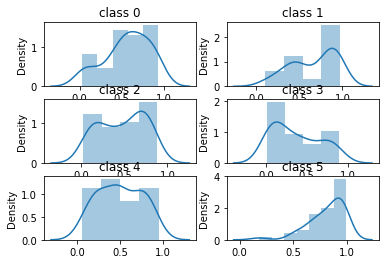

In [ ]:
fig, axes = plt.subplots(3, 2)
for i, y in enumerate(range(6)):
    axes[i // 2, i % 2].set_title(f"class {y}")
    sb.distplot(pred_valid_prob[np.where(y_valid == y)[0], y], hist=True, ax=axes[i // 2, i % 2])

In [ ]:
valid_ds.datasets[0].windows.event_id

{'gật đầu_Thinking': 0,
 'lắc đầu_Thinking': 1,
 'nâng chân phải_Thinking': 2,
 'nâng chân trái_Thinking': 3,
 'nâng tay phải_Thinking': 4,
 'nâng tay trái_Thinking': 5}

In [ ]:
x = ds.datasets[0].windows.get_data()
x.shape